In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.ticker import MaxNLocator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import patsy
import numpy as np
import networkx as nx
import csv
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.genmod.families import NegativeBinomial
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from scipy.stats import kruskal
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data Processing

In [2]:
# Loading the Border Crossing Entry data as a dataframe
data1 = (r'C:\Users\saiha\OneDrive\Desktop\Data Science\Thesis\Border_Crossing_Entry_Data.csv')
border_data = pd.read_csv(data1)
border_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)


In [3]:
border_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394866 entries, 0 to 394865
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  394866 non-null  object 
 1   State      394866 non-null  object 
 2   Port Code  394866 non-null  int64  
 3   Border     394866 non-null  object 
 4   Date       394866 non-null  object 
 5   Measure    394866 non-null  object 
 6   Value      394866 non-null  int64  
 7   Latitude   394866 non-null  float64
 8   Longitude  394866 non-null  float64
 9   Point      394866 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.1+ MB


In [4]:
# Convert Date to datetime format
border_data["Date"] = pd.to_datetime(border_data["Date"], format="%b %Y") 

# split date into year and month
border_data["Year"] = border_data["Date"].dt.year
border_data["Month"] = border_data["Date"].dt.month  

In [5]:
border_data.isna().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
Year         0
Month        0
dtype: int64

In [6]:
# Get categorical column value counts
border_data["State"].value_counts()
border_data["Measure"].value_counts()
border_data["State"].value_counts()


North Dakota    63741
Washington      50536
Maine           43418
Montana         42382
Texas           41946
Minnesota       26182
New York        24169
Arizona         22091
California      21636
Vermont         18895
Alaska          12762
Michigan        12123
Idaho            7593
New Mexico       7392
Name: State, dtype: int64

In [7]:
border_data.describe()

,Port Code,Value,Latitude,Longitude,Year,Month
count,394866.000000,3.948660e+05,394866.000000,394866.000000,394866.000000,394866.000000
mean,2446.627978,2.882798e+04,43.975078,-99.732194,2008.606044,6.451254
std,1204.088182,1.495966e+05,8.151572,18.258399,7.720236,3.441196
min,101.000000,0.000000e+00,25.952000,-141.001000,1996.000000,1.000000
25%,2304.000000,0.000000e+00,42.999000,-114.728000,2002.000000,3.000000
50%,3012.000000,1.420000e+02,48.122000,-101.628000,2008.000000,6.000000
75%,3401.000000,2.975000e+03,49.000000,-89.585000,2015.000000,9.000000
max,3814.000000,4.447374e+06,62.615000,-66.980000,2024.000000,12.000000


In [8]:
# Loading the disasters data as a dataframe
data2 = (r'C:\Users\saiha\OneDrive\Desktop\Data Science\Thesis\us_disaster_declarations.csv\us_disaster_declarations.csv')
disaster = pd.read_csv(data2)
disaster.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [9]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [10]:
disaster_missing = disaster.isnull().sum()
disaster_missing_percentage = (disaster_missing / len(disaster)) * 100
disaster_missing_data = pd.DataFrame({'Missing Values': disaster_missing, 'Percentage (%)': disaster_missing_percentage})
disaster_missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
last_ia_filing_date,46339,72.300755
disaster_closeout_date,15180,23.684703
incident_end_date,8410,13.121762
fema_declaration_string,0,0.000000
incident_begin_date,0,0.000000
hash,0,0.000000
last_refresh,0,0.000000
declaration_request_number,0,0.000000
designated_area,0,0.000000
place_code,0,0.000000


In [11]:
# Drop columns that have a lot of percentage of missing values
disaster.drop(columns=["last_ia_filing_date", "disaster_closeout_date"], inplace=True)

In [12]:
# Fill incident end date missing values with incident begin date values
disaster["incident_end_date"] = disaster["incident_end_date"].fillna(disaster["incident_begin_date"])
# Drop columns that are not needed
disaster.drop(columns=["id", "hash", "last_refresh"], inplace=True)
# Change cols to datetime data type
date_cols = ["declaration_date", "incident_begin_date", "incident_end_date"]
for col in date_cols:
    disaster[col] = pd.to_datetime(disaster[col])
disaster['Year'] = disaster['incident_begin_date'].dt.year
disaster['Month'] = disaster['incident_begin_date'].dt.month

In [13]:
(disaster['state'] == 'PW').sum()
# Find the index of the row containing "PW" in the "state" column
pw_index = disaster[disaster["state"] == "PW"].index

# Drop the row using the index
disaster.drop(index=pw_index, inplace=True)

In [14]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64091 entries, 0 to 64091
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   fema_declaration_string     64091 non-null  object             
 1   disaster_number             64091 non-null  int64              
 2   state                       64091 non-null  object             
 3   declaration_type            64091 non-null  object             
 4   declaration_date            64091 non-null  datetime64[ns, UTC]
 5   fy_declared                 64091 non-null  int64              
 6   incident_type               64091 non-null  object             
 7   declaration_title           64091 non-null  object             
 8   ih_program_declared         64091 non-null  int64              
 9   ia_program_declared         64091 non-null  int64              
 10  pa_program_declared         64091 non-null  int64         

In [15]:
# Change column name for border data
border_data.rename(columns={'State': 'state'}, inplace=True)

In [16]:
# Mapping for state abbreviations to full names
abbrev_to_full_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts",
    "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri", "MT": "Montana",
    "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico",
    "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota",
    "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington",
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

# Apply mapping on disaster state column to get full names for abbreviations
disaster['state'] = disaster['state'].map(abbrev_to_full_mapping)


## Exploratory Data Analysis (EDA)

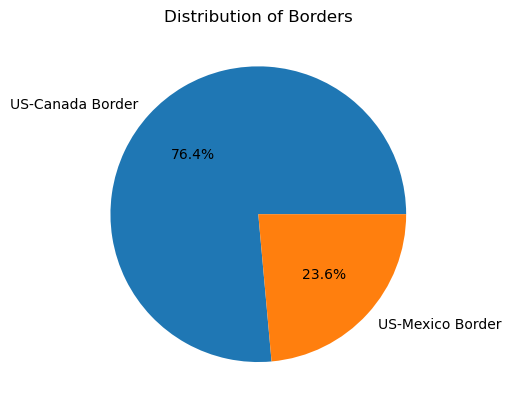

In [17]:
# Distribution of Border
border_data["Border"].value_counts().sort_index().plot(kind="pie", autopct='%1.1f%%',title="Distribution of Borders")
plt.ylabel('')
plt.show()

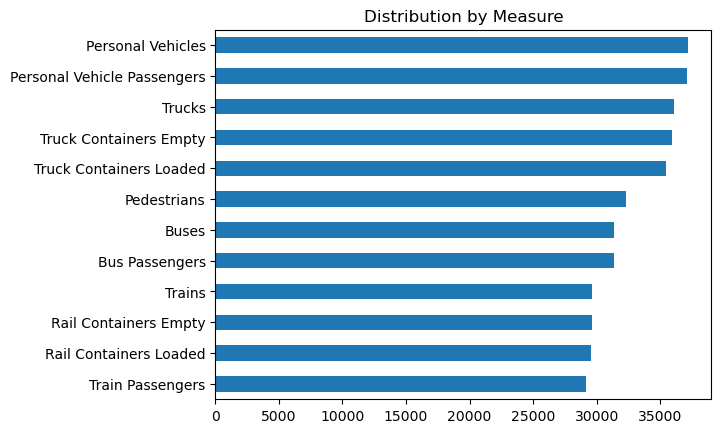

In [18]:
border_data["Measure"].value_counts().sort_values(ascending=True).plot(kind="barh", title="Distribution by Measure")
plt.show()

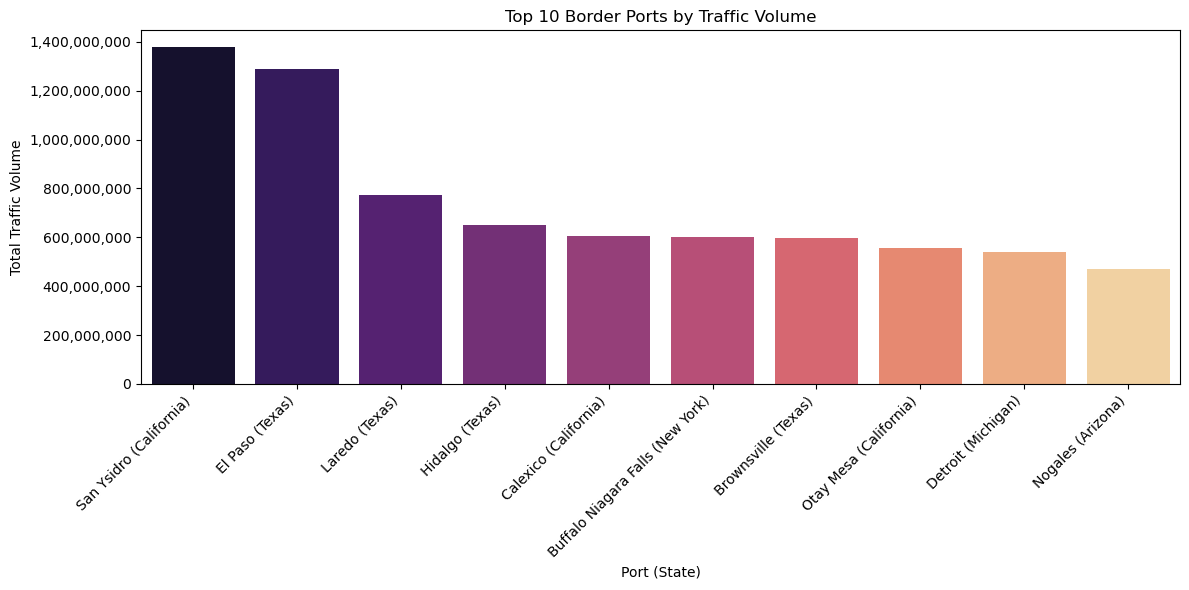

In [19]:
# Group by Port Name and State
top_ports = (
    border_data.groupby(["Port Name", "state"])["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Create label with the state name next to it
top_ports["Port (State)"] = top_ports["Port Name"] + " (" + top_ports["state"] + ")"
plt.figure(figsize=(12,6))
sns.barplot(x="Port (State)", y="Value", data=top_ports, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Border Ports by Traffic Volume")
plt.ylabel("Total Traffic Volume")
plt.xlabel("Port (State)")

# Format y-axis into full numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
#plt.savefig("high_ports.png", dpi=300, bbox_inches="tight")
plt.show()


In [20]:
print(border_data["Value"].max())
print(border_data["Value"].sum())

4447374
11383189161


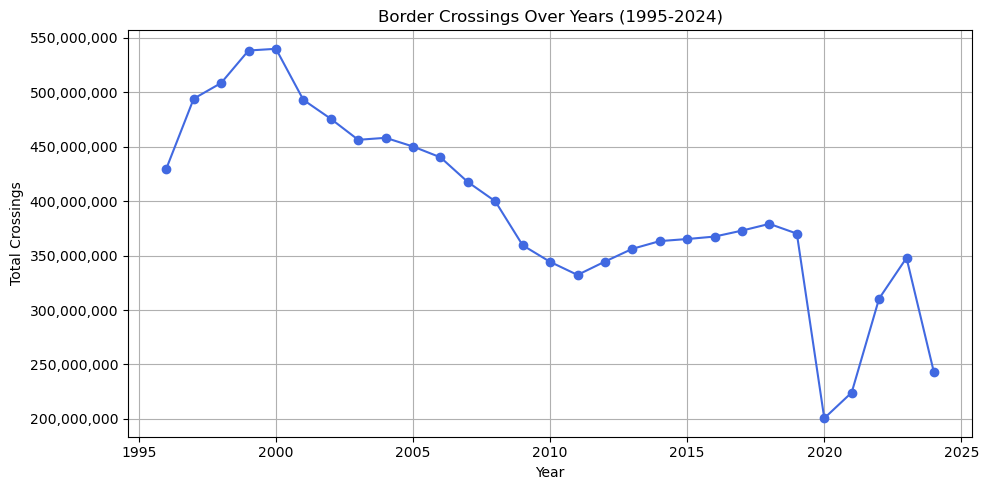

In [21]:
# Group by Year and sum the 'Value'
yearly_traffic = border_data.groupby("Year")["Value"].sum()

# Plot
plt.figure(figsize=(10, 5))
yearly_traffic.plot(kind="line", marker="o", color="royalblue")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Year")
plt.ylabel("Total Crossings")
plt.title("Border Crossings Over Years (1995-2024)")
plt.grid(True)
plt.tight_layout()
#plt.savefig("border_year.png", dpi=300, bbox_inches="tight")
plt.show()


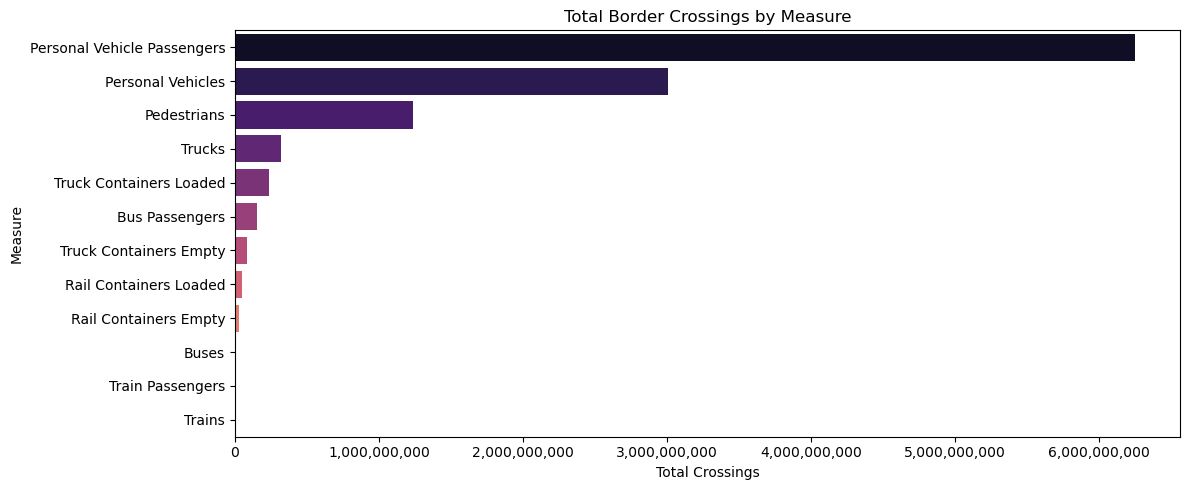

In [22]:
# Total crossings by Measure
measure_counts = border_data.groupby("Measure")["Value"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(y=measure_counts.index, x=measure_counts.values, palette="magma", orient="h")
plt.title("Total Border Crossings by Measure")
plt.xlabel("Total Crossings")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
#plt.savefig("high_measure.png", dpi=300, bbox_inches="tight")
plt.show()


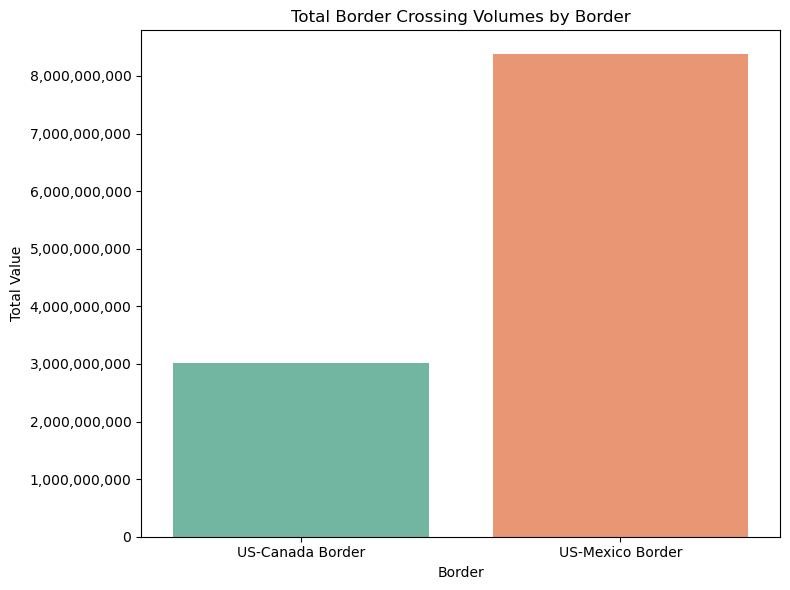

In [23]:
# Grouping Border and Value
border_volumes = border_data.groupby('Border')['Value'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Border', y='Value', data=border_volumes, palette="Set2")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Total Border Crossing Volumes by Border')
plt.xlabel('Border')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show()


<AxesSubplot:title={'center':'Traffic Volume by Border and Measure Type'}, xlabel='Border'>

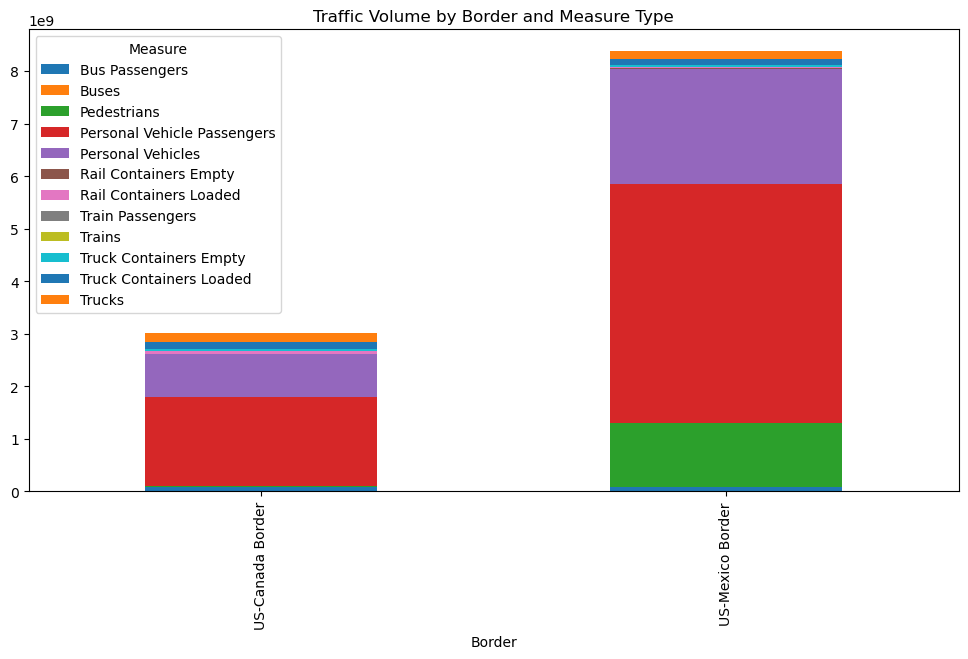

In [24]:
# Traffic Volume by Border and Measure Type
border_measure_volumes = border_data.groupby(['Border', 'Measure'])['Value'].sum().unstack().fillna(0)
border_measure_volumes.plot(kind='bar', stacked=True, figsize=(12, 6), title="Traffic Volume by Border and Measure Type")

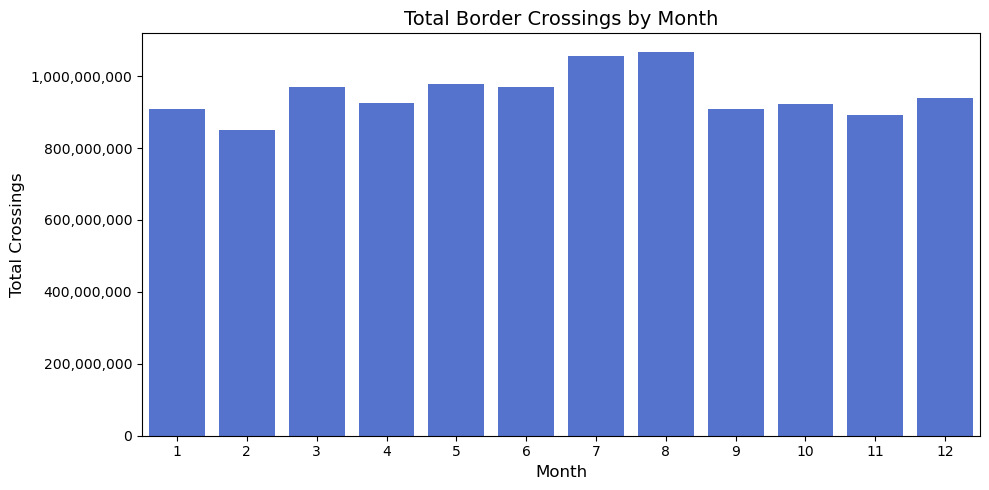

In [25]:
# Group by month and sum values
monthly_volumes = border_data.groupby(border_data['Date'].dt.month)['Value'].sum()

# Create plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_volumes.index, y=monthly_volumes.values, color="royalblue")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Total Border Crossings by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Crossings", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("border_month.png", dpi=300, bbox_inches="tight")
plt.show()


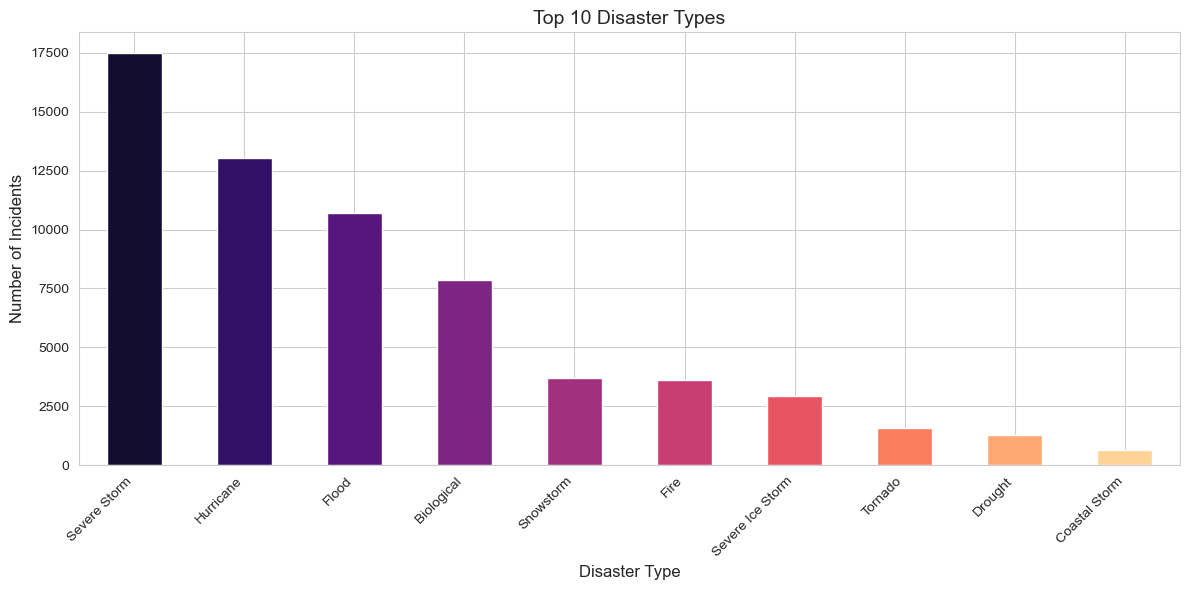

In [26]:
sns.set_style("whitegrid")

# Get top 10 disaster types
top_10_disasters = disaster["incident_type"].value_counts().sort_values(ascending=False).head(10)
colors = sns.color_palette("magma", len(top_10_disasters))

# Plot
plt.figure(figsize=(12, 6))
top_10_disasters.plot(kind="bar", color=colors)
plt.title("Top 10 Disaster Types", fontsize=14)
plt.xlabel("Disaster Type", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig("disaser_count.png", dpi=300, bbox_inches="tight")
plt.show()


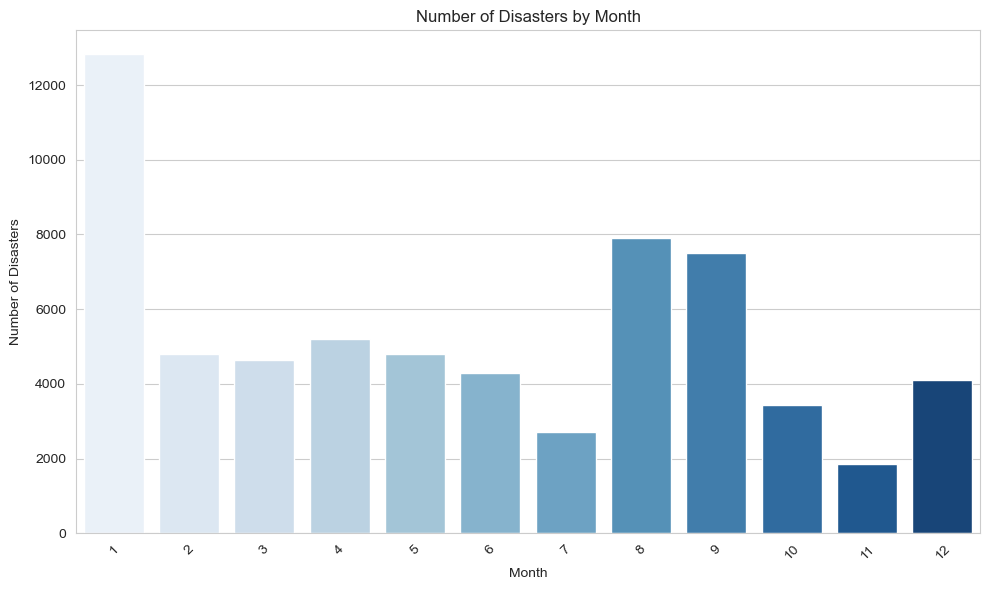

In [27]:
# Group by month
monthly_disasters = disaster.groupby('Month')['disaster_number'].count().reset_index()

# Plot as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='disaster_number', data=monthly_disasters, palette='Blues')
plt.title('Number of Disasters by Month')
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)  # Optional: Rotate labels if needed
plt.tight_layout()
#plt.savefig("month_dis.png", dpi=300, bbox_inches="tight")
plt.show()


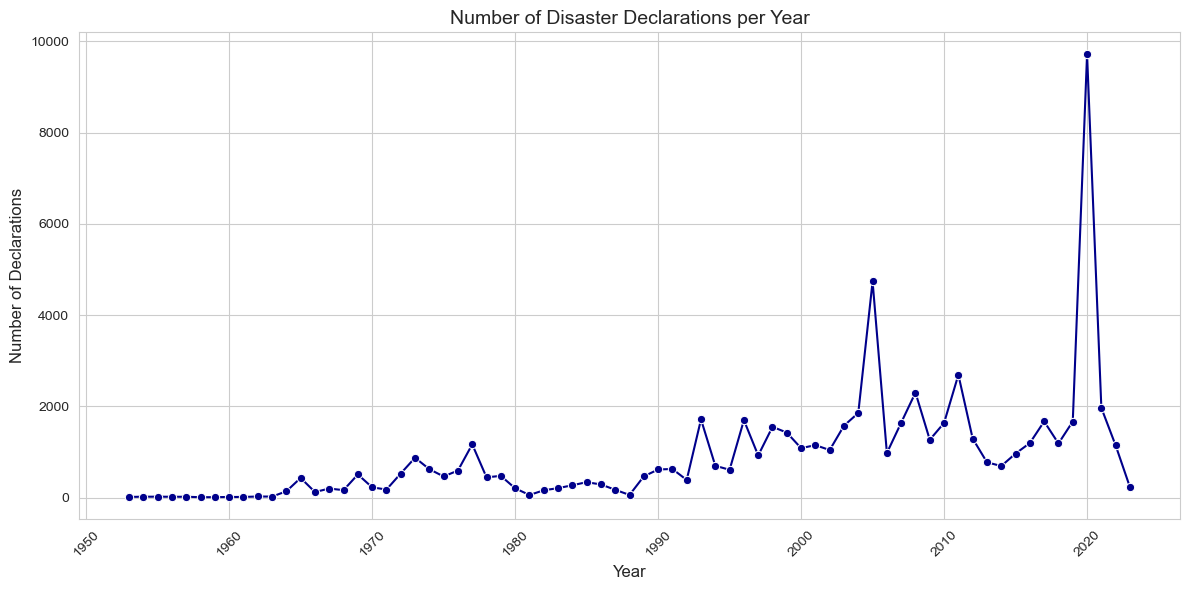

In [28]:
disaster['declaration_date'] = pd.to_datetime(disaster['declaration_date'], errors='coerce')
disaster['year_declared'] = disaster['declaration_date'].dt.year

# Count declarations per year
yearly_counts = disaster['year_declared'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='darkblue')
plt.title("Number of Disaster Declarations per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Declarations", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("declarations_by_year.png", dpi=300, bbox_inches="tight")
plt.show()


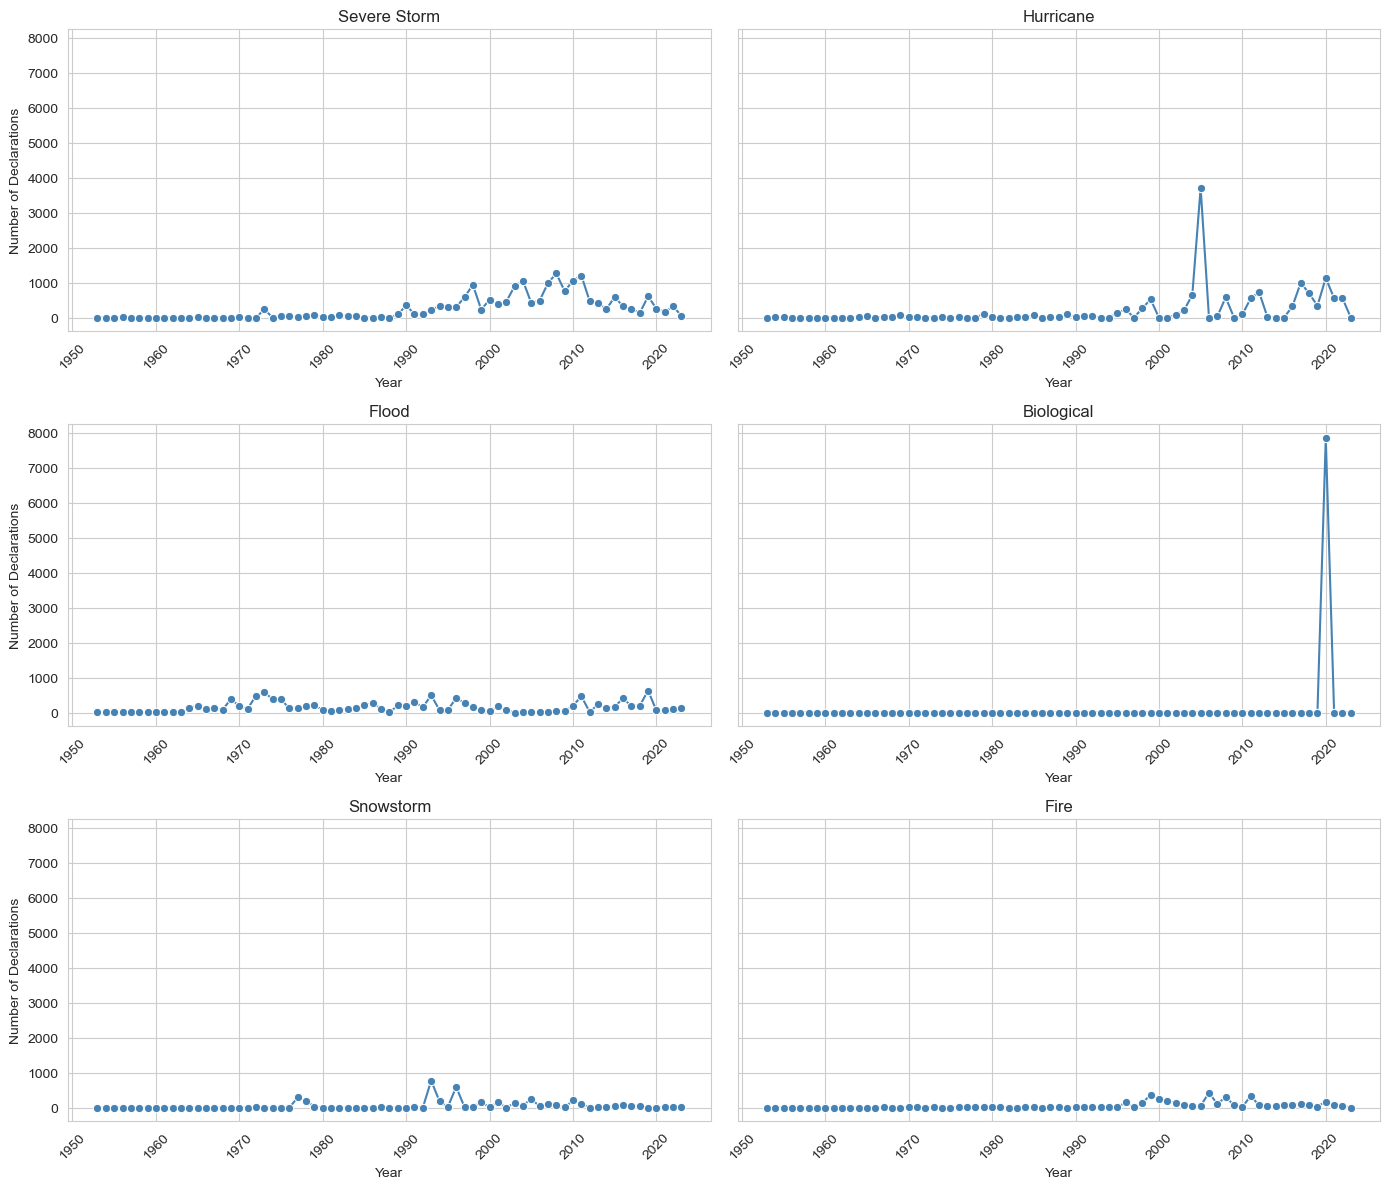

In [29]:
# Extract and clean year
disaster['year_declared'] = disaster['declaration_date'].dt.year.astype('Int64')

# Define consistent year range for all plots
min_year = disaster['year_declared'].min()
max_year = disaster['year_declared'].max()
year_range = range(min_year, max_year + 1)

# Get top 6 incident types
top_6_incidents = disaster['incident_type'].value_counts().head(6).index
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True)
sns.set_style("whitegrid")
axes = axes.flatten()

# Loop and plot for each top incident type
for i, incident in enumerate(top_6_incidents):
    filtered = disaster[disaster['incident_type'] == incident]
    yearly_counts = (
        filtered['year_declared']
        .value_counts()
        .reindex(year_range, fill_value=0)
        .sort_index()
    )

    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', ax=axes[i], color='steelblue')
    axes[i].set_title(incident, fontsize=12)
    axes[i].set_xlabel("Year", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

    if i % 2 == 0:
        axes[i].set_ylabel("Number of Declarations", fontsize=10)
    else:
        axes[i].set_ylabel("")

# Hide any unused subplots (in case there are fewer than 6)
for j in range(len(top_6_incidents), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("declarations_type_year.png", dpi=300, bbox_inches="tight")
plt.show()


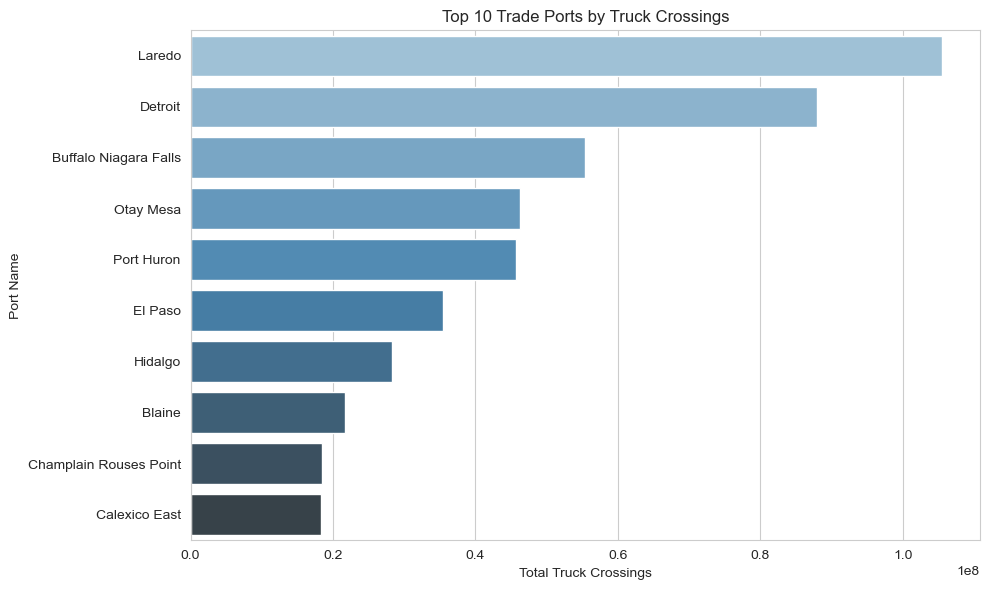

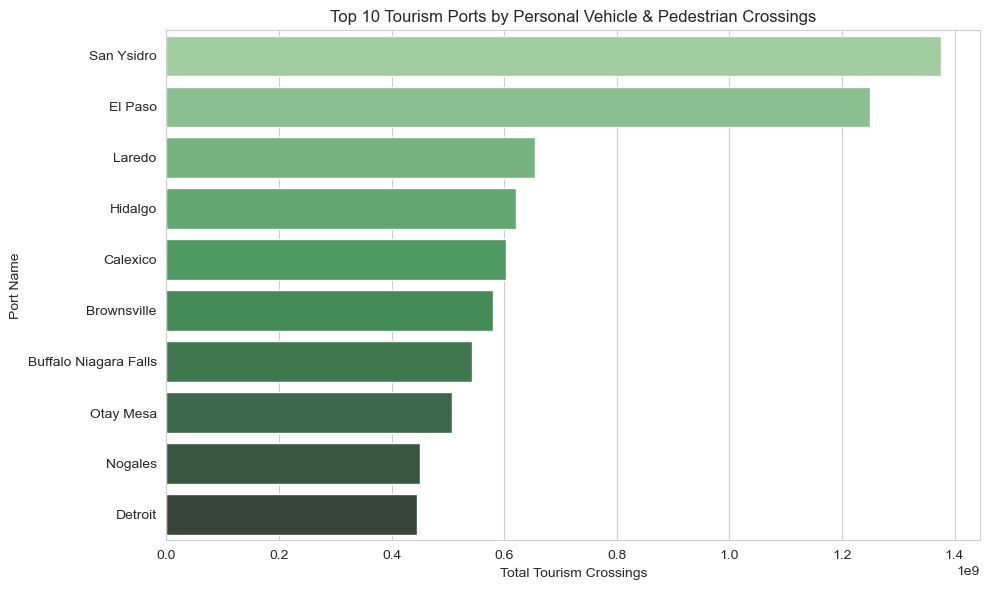

In [30]:
port_measure_totals = (
    border_data.groupby(["Port Name", "Measure"])["Value"]
    .sum()
    .reset_index()
)
def classify_measure(measure):
    if "Truck" in measure:
        return "Trade"
    elif any(x in measure for x in ["Personal Vehicle", "Passenger", "Pedestrian"]):
        return "Tourism"
    else:
        return "Other"

port_measure_totals["Category"] = port_measure_totals["Measure"].apply(classify_measure)
def classify_measure(measure):
    if "Truck" in measure:
        return "Trade"
    elif any(x in measure for x in ["Personal Vehicle", "Passenger", "Pedestrian"]):
        return "Tourism"
    else:
        return "Other"

port_measure_totals["Category"] = port_measure_totals["Measure"].apply(classify_measure)
category_totals = (
    port_measure_totals.groupby(["Port Name", "Category"])["Value"]
    .sum()
    .reset_index()
)
pivot = category_totals.pivot(index="Port Name", columns="Category", values="Value").fillna(0)
top_trade_ports = pivot.sort_values("Trade", ascending=False).head(10)
top_tourism_ports = pivot.sort_values("Tourism", ascending=False).head(10)

# Top Trade Ports
plt.figure(figsize=(10,6))
sns.barplot(x=top_trade_ports["Trade"], y=top_trade_ports.index, palette="Blues_d")
plt.title("Top 10 Trade Ports by Truck Crossings")
plt.xlabel("Total Truck Crossings")
plt.ylabel("Port Name")
plt.tight_layout()
plt.show()

# Top Tourism Ports
plt.figure(figsize=(10,6))
sns.barplot(x=top_tourism_ports["Tourism"], y=top_tourism_ports.index, palette="Greens_d")
plt.title("Top 10 Tourism Ports by Personal Vehicle & Pedestrian Crossings")
plt.xlabel("Total Tourism Crossings")
plt.ylabel("Port Name")
plt.tight_layout()
plt.show()


In [31]:
# Calculate the number of ports per state
state_counts = border_data["state"].value_counts().reset_index()
state_counts.columns = ["state", "count"]
state_counts

,state,count
0,North Dakota,63741
1,Washington,50536
2,Maine,43418
3,Montana,42382
4,Texas,41946
5,Minnesota,26182
6,New York,24169
7,Arizona,22091
8,California,21636
9,Vermont,18895


In [32]:
try:
    us_states = gpd.read_file("cb_2018_us_state_5m\cb_2018_us_state_5m.shp")
except FileNotFoundError:
    print("Error: 'us_states.shp' not found. Please download a US states shapefile and place it in the same directory or update the path.")
    exit()


In [33]:
# Create geometry column
border_data["geometry"] = border_data.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

# Convert to GeoDataFrame
gdf_border = gpd.GeoDataFrame(border_data, geometry="geometry", crs="EPSG:4326")


In [34]:
mexico_border = gdf_border[gdf_border["Border"] == "US-Mexico Border"]
canada_border = gdf_border[gdf_border["Border"] == "US-Canada Border"]

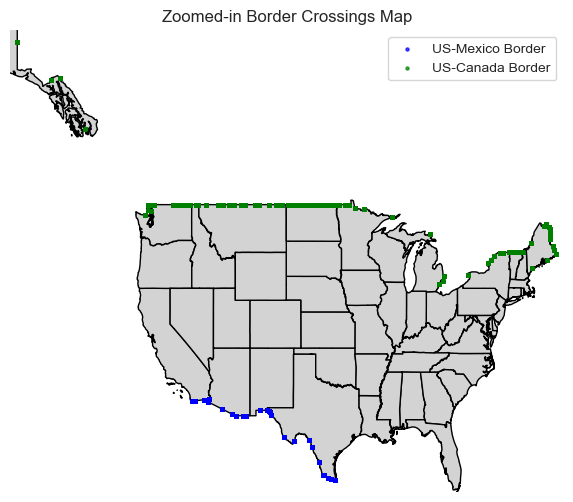

In [35]:
# Get the min and max coordinates for zooming
minx, miny, maxx, maxy = gdf_border.total_bounds
buffer = 1
fig, ax = plt.subplots(figsize=(10, 6))
us_states.plot(ax=ax, color="lightgrey", edgecolor="black")
mexico_border.plot(ax=ax, color="blue", markersize=5, alpha=0.7, label="US-Mexico Border")
canada_border.plot(ax=ax, color="green", markersize=5, alpha=0.7, label="US-Canada Border")

# Apply zoom
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)
ax.axis('off')
plt.legend()
plt.title("Zoomed-in Border Crossings Map")
plt.savefig("border_crossings_map.png", dpi=300, bbox_inches="tight")
plt.show()


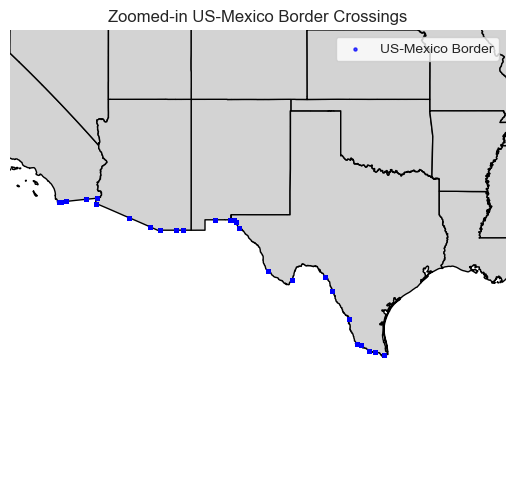

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
us_states.plot(ax=ax, color="lightgrey", edgecolor="black")
gdf_border.plot(ax=ax, color="blue", markersize=5, alpha=0.7, label="US-Mexico Border")

# zooming into mexico
ax.set_xlim(-120, -90) 
ax.set_ylim(20, 40) 
ax.axis('off')
plt.legend()
plt.title("Zoomed-in US-Mexico Border Crossings")
#plt.savefig("mexico_border_crossings.png", dpi=300, bbox_inches="tight")
plt.show()


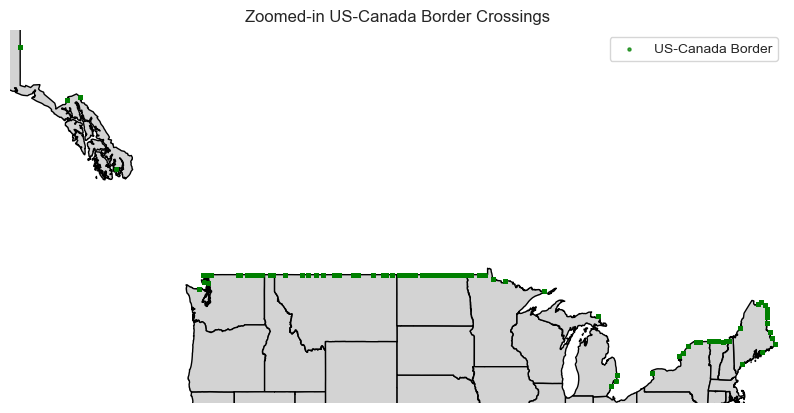

In [37]:
# Filter US-Canada border crossings
canada_border = gdf_border[gdf_border["Border"] == "US-Canada Border"]

# Get min/max coordinates for zooming
minx, miny, maxx, maxy = canada_border.total_bounds
buffer = 1  
fig, ax = plt.subplots(figsize=(10, 6))
us_states.plot(ax=ax, color="lightgrey", edgecolor="black")
canada_border.plot(ax=ax, color="green", markersize=5, alpha=0.7, label="US-Canada Border")

# Apply zoom
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)
ax.axis('off')
plt.legend()
plt.title("Zoomed-in US-Canada Border Crossings")
#plt.savefig("canada_border_crossings_map.png", dpi=300, bbox_inches="tight")
plt.show()

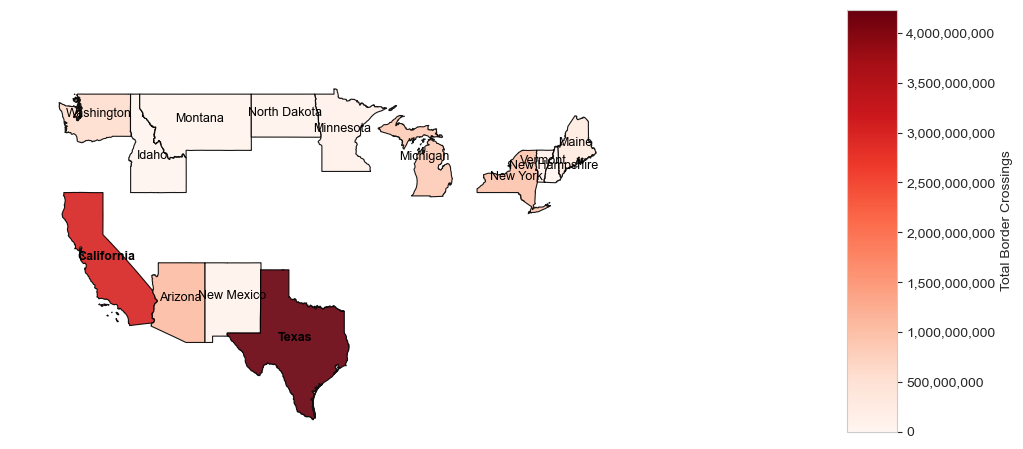

In [38]:
plt.rcParams["axes.formatter.use_mathtext"] = False  # Disable scientific notation
plt.rcParams["axes.formatter.limits"] = (-99, 99)    # Always show full numbers

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

state_counts = border_data.groupby("state")["Value"].sum().reset_index()
state_counts.rename(columns={"Value": "Total_Crossings"}, inplace=True)

us_states = us_states.merge(state_counts, left_on="NAME", right_on="state", how="left")
us_states["Total_Crossings"] = us_states["Total_Crossings"].fillna(0)

border_states = [
    "Texas", "New Mexico", "Arizona", "California",  # US-Mexico
    "Maine", "New Hampshire", "Vermont", "New York", "Michigan",  # US-Canada
    "Minnesota", "North Dakota", "Montana", "Idaho", "Washington", "Alaska"
]
border_states_map = us_states[us_states["NAME"].isin(border_states)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)

# Legend colors
cax = divider.append_axes("right", size="5%", pad=0.2)
norm = Normalize(vmin=border_states_map["Total_Crossings"].min(), 
                 vmax=border_states_map["Total_Crossings"].max())
cmap = cm.Reds

# Plot the heatmap
border_states_map.plot(
    column="Total_Crossings",
    cmap=cmap,
    linewidth=0.8,
    edgecolor="black",
    ax=ax,
    alpha=0.9
)

# Add colorbar manually
cb = ColorbarBase(
    cax,
    cmap=cmap,
    norm=norm,
    orientation="vertical",
    format=FuncFormatter(lambda x, _: f"{x:,.0f}")    # full numbers on legend
)
cb.set_label("Total Border Crossings", fontsize=10)

# State Labels
for idx, row in border_states_map.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        text=row["NAME"],
        xy=(centroid.x, centroid.y),
        fontsize=9,
        fontweight="bold" if row["Total_Crossings"] > 3_000_000_000 else "normal",
        color="black",
        ha="center"
    )

ax.set_xlim(-130, -60)
ax.set_ylim(25, 55)
ax.axis("off")
plt.tight_layout()
#plt.savefig("choropleth_border.png", dpi=300, bbox_inches="tight")
plt.show()


In [39]:
# Aggregate disaster declarations per state
state_disaster_counts = disaster.groupby("state")["disaster_number"].count().reset_index()
state_disaster_counts.rename(columns={"disaster_number": "Total_Disasters"}, inplace=True)

In [40]:
# If state codes (e.g., "TX") are used in fema_data instead of full names, we need to map them
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


In [41]:
disaster = disaster.dropna()

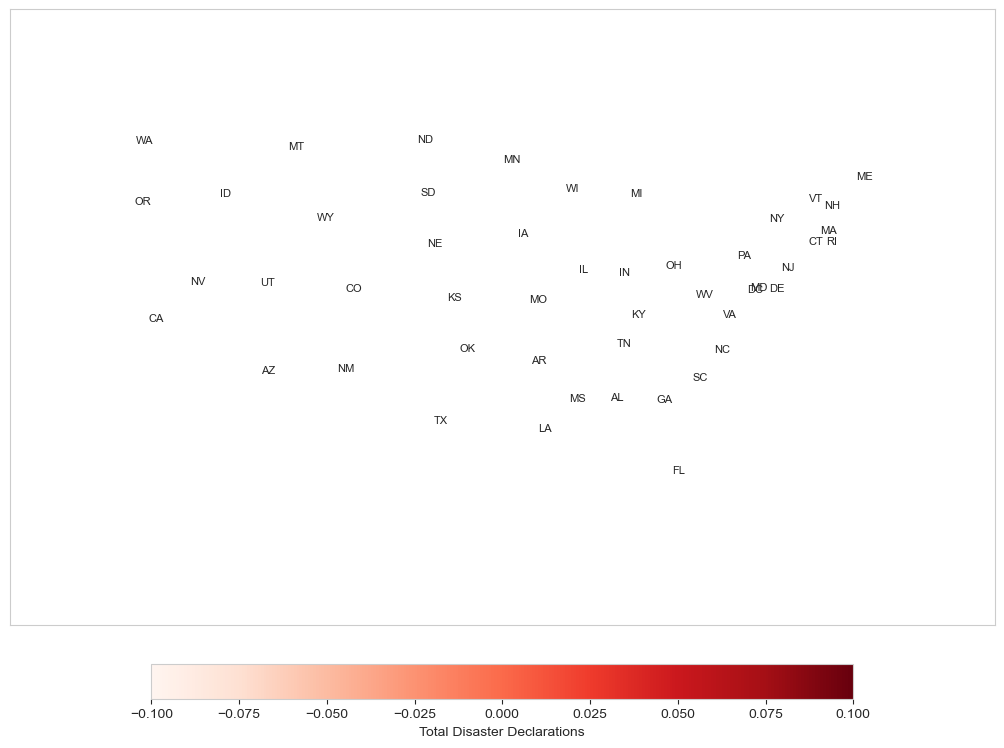

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Aggregate border crossings by state
border_agg = border_data.groupby("state")["Value"].sum().reset_index()
border_agg.rename(columns={"Value": "Total_Border_Crossings"}, inplace=True)

# Aggregate disaster declarations by state
disaster_agg = disaster.groupby("state")["disaster_number"].count().reset_index()
disaster_agg.rename(columns={"disaster_number": "Total_Disaster_Declarations", "state": "state"}, inplace=True)

# Merge both datasets on "State"
combined_data = pd.merge(border_agg, disaster_agg, on="state", how="outer")
combined_data = combined_data.dropna()
# Load the US shapefile
us_states = gpd.read_file("cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
us_states = us_states.rename(columns={"STUSPS": "state"})

# Remove non-continental states and territories
us_states = us_states[~us_states["state"].isin(["AK", "HI", "AS", "MP", "GU", "PR", "VI"])]

# Merge shapefile with combined data
us_states = us_states.merge(combined_data, on="state", how="left")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the map
plot = us_states.plot(
    column="Total_Disaster_Declarations",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Total Disaster Declarations",
        "orientation": "horizontal",
        "shrink": 0.6,
        "pad": 0.05
    }
)

# Add state labels
for idx, row in us_states.iterrows():
    centroid = row.geometry.centroid
    if pd.notnull(row["state"]):
        plt.text(centroid.x, centroid.y, row["state"], fontsize=8, ha="center")

# Set bounds to focus on continental US
ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)
ax.set_xticks([])
ax.set_yticks([])

# Title (optional)
#plt.title("Disaster Declarations by State", fontsize=14)
plt.savefig("choropleth_disaster.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [43]:
print(us_states[["state", "Total_Disaster_Declarations"]].isnull().sum())

state                           0
Total_Disaster_Declarations    49
dtype: int64


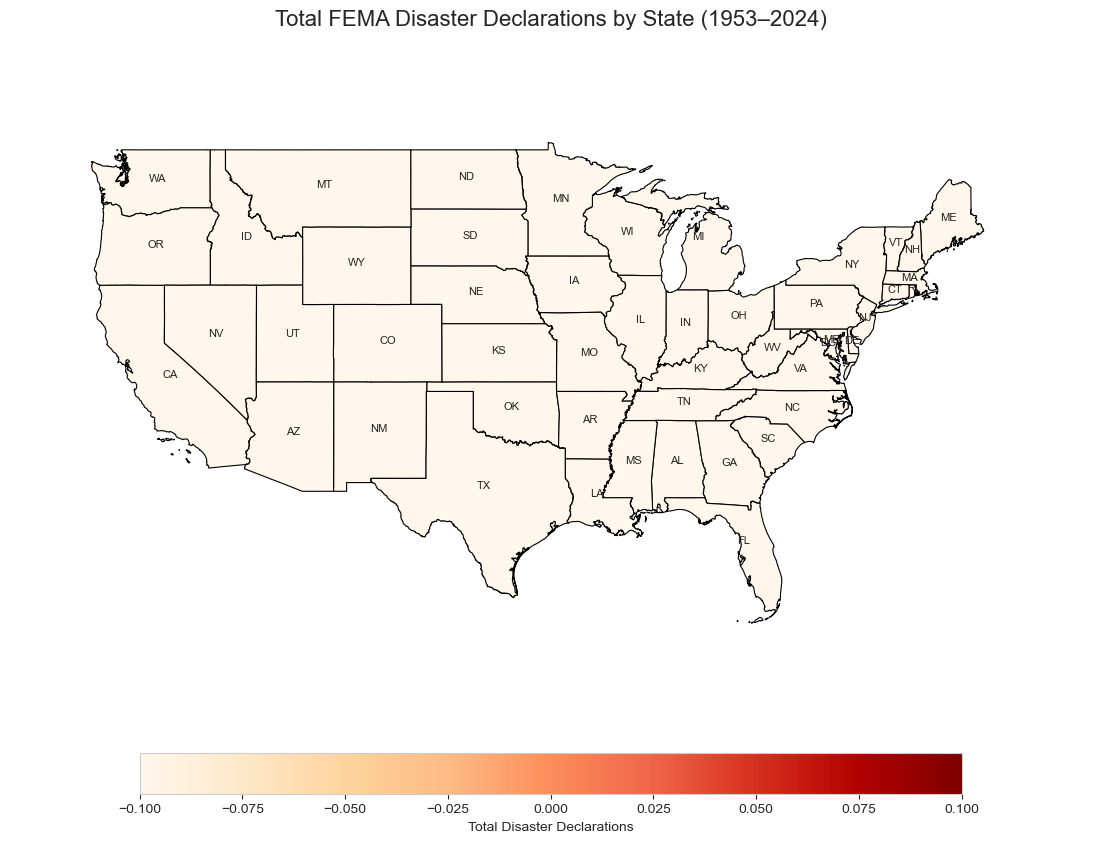

In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Aggregate disaster declarations by state
disaster_agg = (
    disaster.groupby("state")["disaster_number"]
    .count()
    .reset_index()
    .rename(columns={"disaster_number": "Total_Disaster_Declarations"})
)

# 2. Load US shapefile
us_states = gpd.read_file("cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

# 3. Rename STUSPS to 'state' to match disaster_agg
us_states = us_states.rename(columns={"STUSPS": "state"})

# 4. Filter for continental US only
excluded_states = ["AK", "HI", "AS", "MP", "GU", "PR", "VI"]
us_states = us_states[~us_states["state"].isin(excluded_states)]

# 5. Merge shapefile GeoDataFrame with disaster counts
us_states = us_states.merge(disaster_agg, on="state", how="left")

# 6. Fill NaNs with 0 for states with no disasters (optional)
us_states["Total_Disaster_Declarations"] = us_states["Total_Disaster_Declarations"].fillna(0)

# 7. Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(14, 9))

us_states.plot(
    column="Total_Disaster_Declarations",
    cmap="OrRd",  # You can change to "Reds", "YlOrRd", etc.
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": "Total Disaster Declarations",
        "orientation": "horizontal",
        "shrink": 0.6,
        "pad": 0.05
    }
)

# 8. Optional: Add state abbreviation labels
for idx, row in us_states.iterrows():
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, row["state"], fontsize=8, ha="center")

# 9. Clean up the plot
ax.set_title("Total FEMA Disaster Declarations by State (1953–2024)", fontsize=16)
ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)
ax.axis("off")

plt.tight_layout()
plt.savefig("disaster_declarations_map.png", dpi=300, bbox_inches="tight")
plt.show()


## Comparative Analysis

In [45]:
disaster_filtered = disaster[disaster["declaration_type"].isin(["DR", "EM", "FM"])]
disaster_agg_text = disaster_filtered.groupby(["state", "Year", "Month"], as_index=False).agg({
    "incident_type": lambda x: ", ".join(x.unique()),
    "disaster_number": "nunique",
    "declaration_type": lambda x: ", ".join(x.unique()),
    "designated_area": lambda x: ", ".join(x.unique())
})

# Merge with border data
combined_text_df = pd.merge(
    border_data,
    disaster_agg_text,
    on=["state", "Year", "Month"],
    how="left"
)


In [46]:
# Drop missing values for merged data
clean_data = combined_text_df.dropna()
border_disaster = clean_data[['Port Name', 'state', 'Border', 'Year', 'Month', 'Measure', 'Value', 'incident_type', 'disaster_number',  'declaration_type', 'designated_area']]
border_disaster

,Port Name,state,Border,Year,Month,Measure,Value,incident_type,disaster_number,declaration_type,designated_area
18,Norton,Vermont,US-Canada Border,2022,12,Trucks,338,Severe Storm,1.0,DR,"Chittenden (County), Essex (County), Franklin ..."
25,Alcan,Alaska,US-Canada Border,2022,9,Buses,1,Severe Storm,1.0,DR,Pribilof Island Regional Educational Attendanc...
28,Skagway,Alaska,US-Canada Border,2022,6,Trucks,266,Fire,1.0,FM,"Denali (Borough), Yukon-Koyukuk (Census Area)"
29,Alcan,Alaska,US-Canada Border,2022,5,Personal Vehicles,5252,"Mud/Landslide, Flood",2.0,DR,"Kenai Peninsula (Borough), Iditarod Area Regio..."
42,Douglas,Arizona,US-Mexico Border,2021,7,Pedestrians,24290,Flood,1.0,DR,"Apache (County), Coconino (County), Navajo (Co..."
...,...,...,...,...,...,...,...,...,...,...,...
388795,Antler,North Dakota,US-Canada Border,1997,2,Truck Containers Empty,0,Flood,1.0,DR,"Adams (County), Barnes (County), Benson (Count..."
388797,Presidio,Texas,US-Mexico Border,1996,4,Truck Containers Loaded,162,Fire,10.0,FM,Statewide
388817,Portland,Maine,US-Canada Border,1996,4,Rail Containers Loaded,0,Severe Storm,1.0,DR,"Androscoggin (County), Cumberland (County), Kn..."
388820,Westhope,North Dakota,US-Canada Border,1996,3,Trains,0,Severe Storm,1.0,DR,"Barnes (County), Benson (County), Burleigh (Co..."


In [47]:
# Filter data for US-Mexico Border
us_mexico_data = border_disaster[border_disaster["Border"] == "US-Mexico Border"]

# Filter data for US-Canada Border
us_canada_data = border_disaster[border_disaster["Border"] == "US-Canada Border"]

In [48]:
# Aggregate border activity by Measure for both borders
us_mexico_activity = us_mexico_data.groupby("Measure")["Value"].sum().reset_index()
us_canada_activity = us_canada_data.groupby("Measure")["Value"].sum().reset_index()
us_mexico_activity.rename(columns={"Value": "US-Mexico Value"}, inplace=True)
us_canada_activity.rename(columns={"Value": "US-Canada Value"}, inplace=True)

# Merge the two datasets for comparison
activity_comparison = pd.merge(
    us_mexico_activity,
    us_canada_activity,
    on="Measure",
    how="outer"
)

In [49]:
border_counts = border_data.groupby('Border')['Value'].sum()

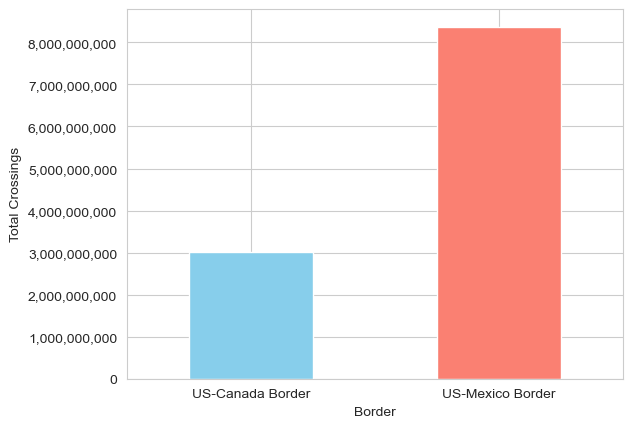

In [50]:
# Create bar plot with custom colors
colors = ['skyblue', 'salmon']  # Customize as needed

ax = border_counts.plot(kind='bar', color=colors)

# Format y-axis to show full numbers
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Labels and title
plt.ylabel('Total Crossings')
#plt.title('Total Border Crossings by Border')
plt.xticks(rotation=0)

# Show the plot
plt.show()

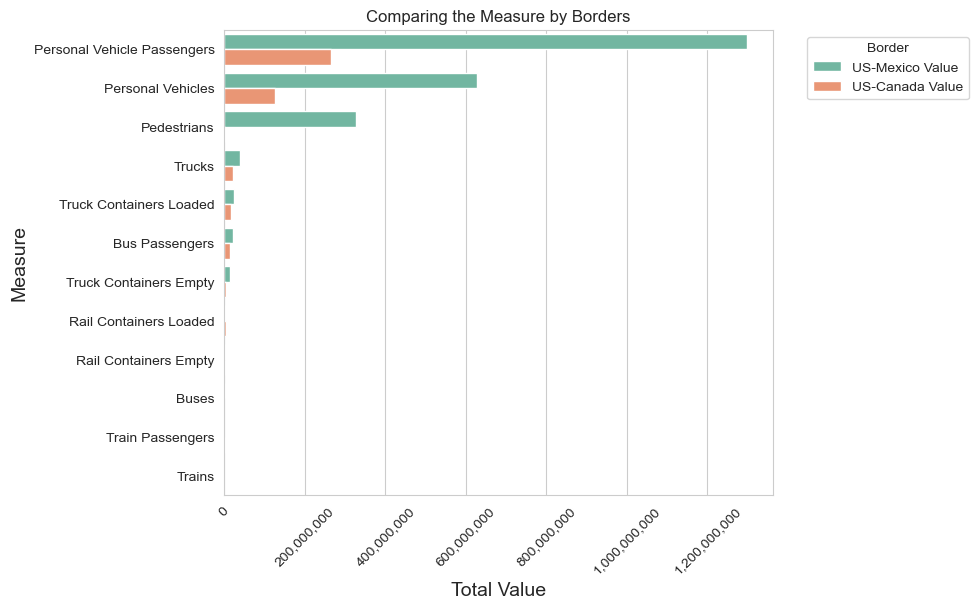

In [51]:
# Let's melt the data for plotting
melted_data = activity_comparison.melt(id_vars="Measure", var_name="Border", value_name="Value")
melted_data = melted_data.sort_values("Value", ascending=False)

# creating bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, y="Measure", x="Value", hue="Border", orient="h", palette="Set2")

# Formatting axis labels and title
plt.xlabel("Total Value", fontsize=14)
plt.ylabel("Measure", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left')

# show full numbers
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Slant x-axis ticks
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout() 
plt.title("Comparing the Measure by Borders")
#plt.savefig("measure_compare.png", dpi=300, bbox_inches="tight")
plt.show()


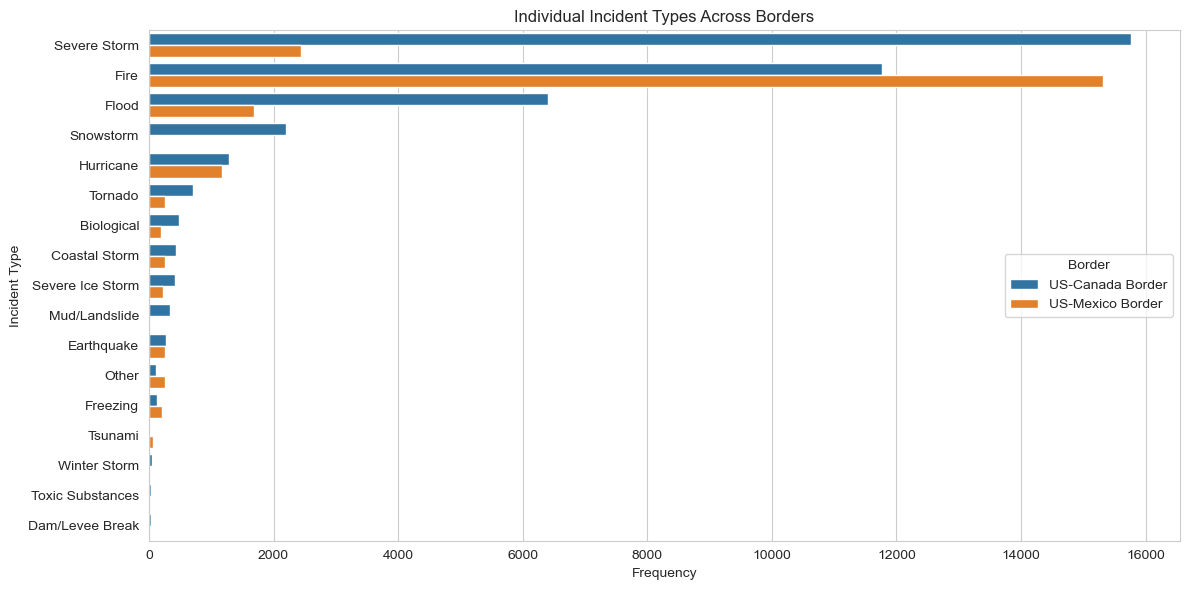

In [52]:
# Count the number of occurrences of each incident type by border
incident_counts = border_disaster.groupby(['incident_type', 'Border']).size().reset_index(name='count')

# Filter out aggregated incident types (those containing commas)
incident_counts_filtered = incident_counts[~incident_counts['incident_type'].str.contains(",", na=False)]

# Sort the data by count
incident_counts_filtered = incident_counts_filtered.sort_values(by="count", ascending=False)

# Create a horizontal bar plot to show the frequency of individual incident types across borders
plt.figure(figsize=(12, 6))
sns.barplot(data=incident_counts_filtered, x="count", y="incident_type", hue="Border", orient="h")
plt.title("Individual Incident Types Across Borders")
plt.xlabel("Frequency")
plt.ylabel("Incident Type")
plt.tight_layout()
plt.savefig("disaster_comparison_full.png", dpi=300, bbox_inches="tight")
plt.show()


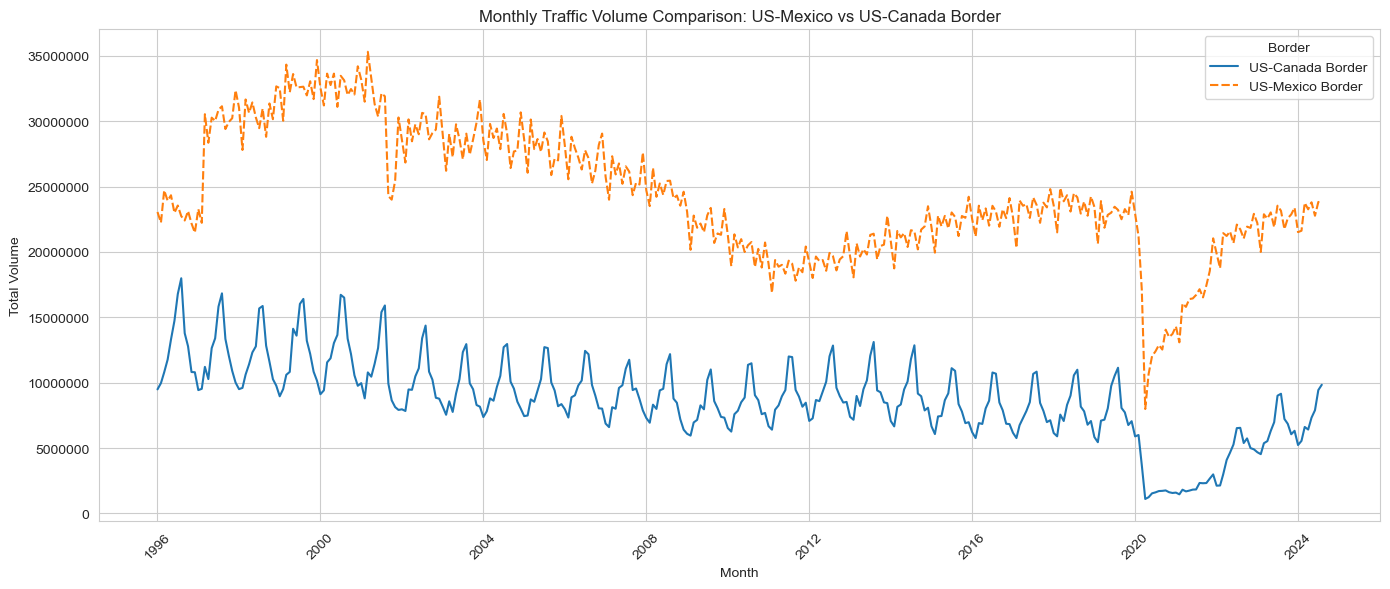

In [53]:
# Load the data
df = border_data.copy()
# Group by Date and Border, then sum the traffic Value
monthly_traffic = df.groupby(['Date', 'Border'])['Value'].sum().reset_index()

# Pivot for plotting
pivot_df = monthly_traffic.pivot(index='Date', columns='Border', values='Value')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=pivot_df)
plt.title('Monthly Traffic Volume Comparison: US-Mexico vs US-Canada Border')
plt.ylabel('Total Volume')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Border')
plt.show()


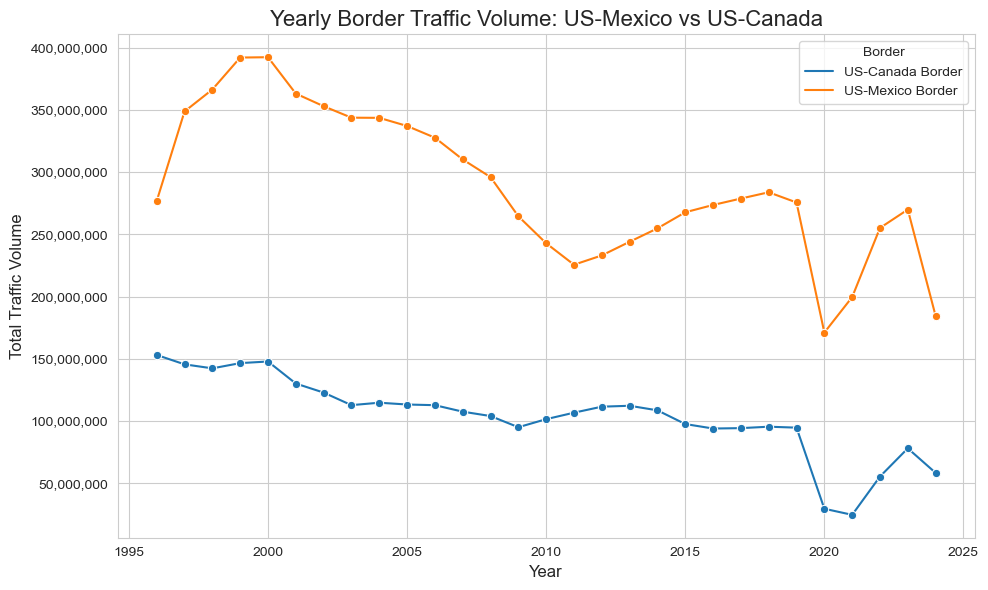

In [54]:
# Group by Year and Border, summing total traffic volume
yearly_traffic = df.groupby(['Year', 'Border'])['Value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_traffic, x='Year', y='Value', hue='Border', marker='o')

# Format y-axis with full numbers
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.title("Yearly Border Traffic Volume: US-Mexico vs US-Canada", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Traffic Volume", fontsize=12)
plt.grid(True)
plt.legend(title="Border")
plt.tight_layout()
#plt.savefig("line_comp.png", dpi=300, bbox_inches="tight")
plt.show()

## Clustering

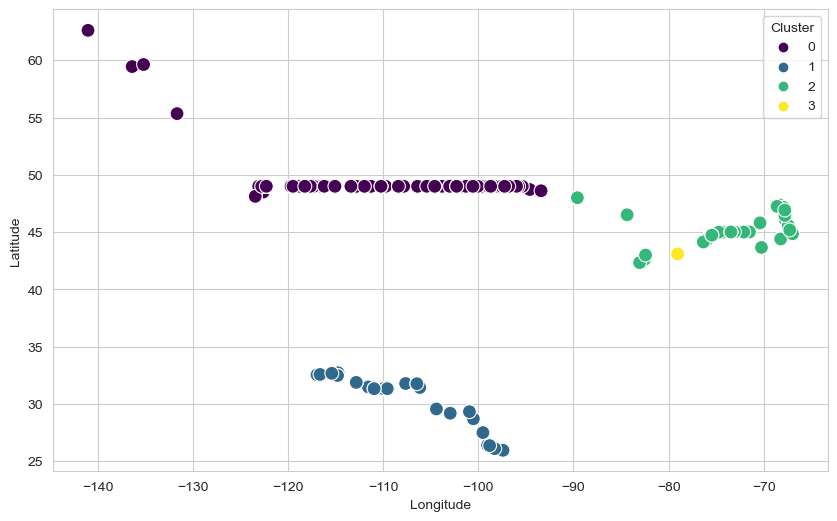

In [55]:
# Select numerical features for clustering
features = df[["Value", "Latitude", "Longitude"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit K-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Longitude", y="Latitude",
    hue="Cluster", data=df,
    palette="viridis", s=100
)
#plt.title("Port Clusters Based on Traffic Volume and Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [91]:
# Drop rows with missing values
df = df.dropna(subset=['Measure', 'Value', 'Latitude', 'Longitude'])

# Features for clustering
X = df[['Value', 'Latitude', 'Longitude', 'Measure']]

# Column types
numeric_features = ['Value', 'Latitude', 'Longitude']
categorical_features = ['Measure']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

# Fit pipeline and predict clusters
clusters = pipeline.fit_predict(X)

# Add clusters to data
df['Cluster'] = clusters
print(df[['Port Name', 'Value', 'Measure', 'Cluster']])


            Port Name  Value                 Measure  Cluster
0                Roma     46                   Buses        0
1             Del Rio   6552                  Trucks        0
2                Roma   3753                  Trucks        0
3             Douglas     13                   Buses        0
4       Beecher Falls    422                  Trucks        1
...               ...    ...                     ...      ...
394861     Ogdensburg      9                   Buses        1
394862      Limestone   1237       Personal Vehicles        1
394863         Turner      8             Pedestrians        3
394864        El Paso  21933          Bus Passengers        0
394865         Calais   2639  Truck Containers Empty        1

[394866 rows x 4 columns]


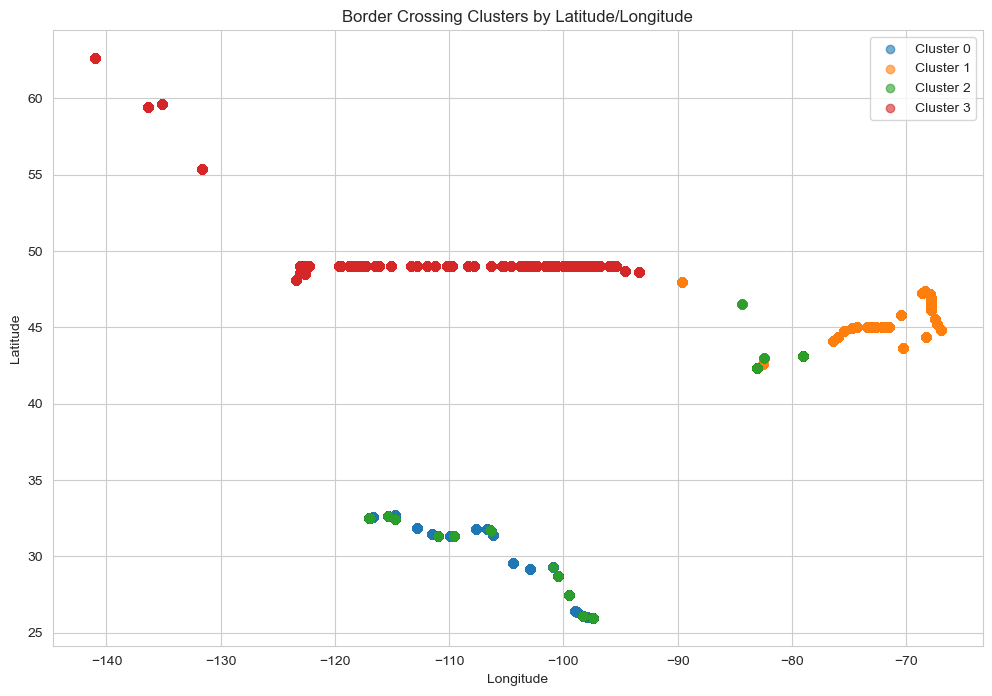

In [57]:
plt.figure(figsize=(12, 8))
# Scatterplot of clusters based on geolocation
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Border Crossing Clusters by Latitude/Longitude')
plt.legend()
plt.grid(True)
plt.show()


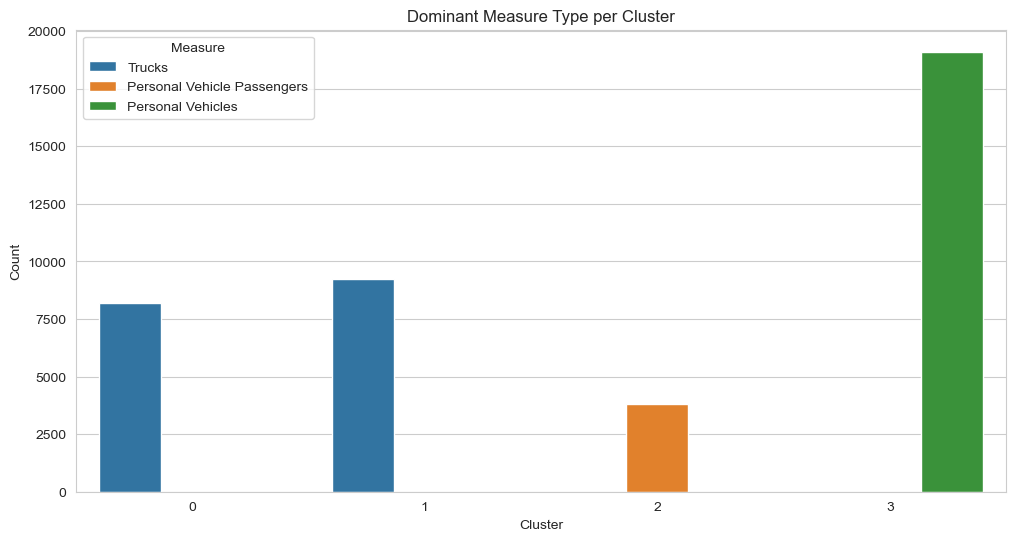

In [58]:
# Group by Cluster and Measure, then count how many times each Measure appears
cluster_measure_counts = df.groupby(['Cluster', 'Measure']).size().reset_index(name='Count')

# For each cluster, find the Measure with the highest count
dominant_measure_per_cluster = cluster_measure_counts.sort_values('Count', ascending=False).groupby('Cluster').first()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=dominant_measure_per_cluster.reset_index(), x='Cluster', y='Count', hue='Measure')
plt.title('Dominant Measure Type per Cluster')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.legend(title='Measure')
plt.show()


## Natural Disaster Impact on Crossings

In [59]:
# Sum crossing values by state, year, month
border_summary = (
    border_data
    .groupby(['state', 'Year', 'Month'])
    .agg({'Value': 'sum'})
    .reset_index()
    .rename(columns={'Value': 'total_crossings'})
)

# Only keep border states
border_states = ['Texas', 'Arizona', 'New Mexico', 'California', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'New York', 'North Dakota', 'Vermont', 'Washington']
disaster = disaster[disaster['state'].isin(border_states)]

# Create a 'disaster_occurred' flag per state and month
disaster_flags = (
    disaster
    .groupby(['state', 'Year', 'Month'])
    .size()
    .reset_index(name='disaster_count')
)

# Set disaster_occurred to 1 if any disaster that month, else 0
disaster_flags['disaster_occurred'] = 1

# Merge Border Crossings and Disaster Flags
combined = pd.merge(
    border_summary,
    disaster_flags[['state', 'Year', 'Month', 'disaster_occurred']],
    on=['state', 'Year', 'Month'],
    how='left'
)

combined['disaster_occurred'] = combined['disaster_occurred'].fillna(0)
combined

,state,Year,Month,total_crossings,disaster_occurred
0,Alaska,1996,1,7705,0.0
1,Alaska,1996,2,7585,0.0
2,Alaska,1996,3,12710,0.0
3,Alaska,1996,4,19454,0.0
4,Alaska,1996,5,48239,0.0
...,...,...,...,...,...
4811,Washington,2024,4,1370617,0.0
4812,Washington,2024,5,1529290,0.0
4813,Washington,2024,6,1555651,0.0
4814,Washington,2024,7,1879757,0.0


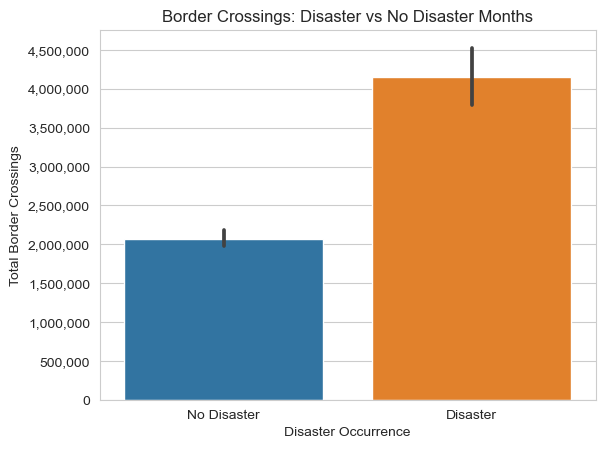

In [60]:
# Create the plot
sns.barplot(x='disaster_occurred', y='total_crossings', data=combined)
plt.title('Border Crossings: Disaster vs No Disaster Months')
plt.xticks([0, 1], ['No Disaster', 'Disaster'])
plt.ylabel("Total Border Crossings")
plt.xlabel("Disaster Occurrence")
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


## Count Data Modeling

In [61]:
disaster['Year'] = disaster['declaration_date'].dt.year
disaster['Month'] = disaster['declaration_date'].dt.month

# Aggregate count of disasters by year-month and state
disaster_counts = (
    disaster.groupby(['state', 'Year', 'Month'])
    .size()
    .reset_index(name='disaster_count')
)


In [62]:
# Merge disaster counts
df_merged = df.merge(disaster_counts, how='left', left_on=['state', 'Year', 'Month'], right_on=['state', 'Year', 'Month'])

# Fill NaNs with 0 (no disasters reported that month in that state)
df_merged['disaster_count'] = df_merged['disaster_count'].fillna(0)


In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert categorical variables if not already
df['Border'] = df['Border'].astype('category')
df['Measure'] = df['Measure'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')
df['state'] = df['state'].astype('category')
df['Port Name'] = df['Port Name'].astype('category')
# Subset for U.S.-Mexico
df_mexico = df_merged[df_merged['Border'] == 'US-Mexico Border']

model_mexico = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_mexico,
    family=sm.families.Poisson()
).fit()

print("=== Poisson GLM for U.S.-Mexico Border ===")
print(model_mexico.summary())



=== Poisson GLM for U.S.-Mexico Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                93065
Model:                            GLM   Df Residuals:                    93050
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.3209e+09
Date:                Wed, 14 May 2025   Deviance:                   1.0641e+10
Time:                        01:27:18   Pearson chi2:                 1.38e+10
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [64]:
# Subset for U.S.-Canada
df_canada = df_merged[df_merged['Border'] == 'US-Canada Border']

model_canada = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_canada,
    family=sm.families.Poisson()
).fit()

print("\n=== Poisson GLM for U.S.-Canada Border ===")
print(model_canada.summary())



=== Poisson GLM for U.S.-Canada Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               301801
Model:                            GLM   Df Residuals:                   301786
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.8021e+09
Date:                Wed, 14 May 2025   Deviance:                   9.6026e+09
Time:                        01:27:23   Pearson chi2:                 2.65e+10
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

### Negative Binomial Distribution

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial
# Replace 'df_mexico' with your actual DataFrame name for Mexico
nb_model_mexico = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_mexico,
    family=NegativeBinomial()
).fit()

print(nb_model_mexico.summary())
# Replace 'df_canada' with your actual DataFrame name for Canada
nb_model_canada = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_canada,
    family=NegativeBinomial()
).fit()

print(nb_model_canada.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                93065
Model:                            GLM   Df Residuals:                    93050
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2107e+05
Date:                Wed, 14 May 2025   Deviance:                   5.0546e+05
Time:                        01:27:25   Pearson chi2:                 5.07e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9934
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [66]:
# Make categorical types
for col in ['Border', 'Measure', 'Month', 'Year', 'state', 'Port Name']:
    df_merged[col] = df_merged[col].astype('category')

# Subset for U.S.-Mexico Border
df_mexico = df_merged[df_merged['Border'] == 'US-Mexico Border'].copy()

# Split into train/test
train, test = train_test_split(df_mexico, test_size=0.2, random_state=42)

# Fit model on training data
model_mexico = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=train,
    family=sm.families.Poisson()
).fit()

# Predict on test data
test['predicted'] = model_mexico.predict(test)

# Evaluate
rmse = np.sqrt(mean_squared_error(test['Value'], test['predicted']))
mae = mean_absolute_error(test['Value'], test['predicted'])

print("=== Poisson GLM for U.S.-Mexico Border ===")
print(model_mexico.summary())
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


=== Poisson GLM for U.S.-Mexico Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                74452
Model:                            GLM   Df Residuals:                    74400
Model Family:                 Poisson   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.1483e+09
Date:                Wed, 14 May 2025   Deviance:                   8.2961e+09
Time:                        01:27:38   Pearson chi2:                 1.07e+10
No. Iterations:                    14   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [67]:
# Subset for U.S.-Mexico Border
df_canada = df_merged[df_merged['Border'] == 'US-Canada Border'].copy()

# Split into train/test
train, test = train_test_split(df_canada, test_size=0.2, random_state=42)

# Fit model on training data
model_canada = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=train,
    family=sm.families.Poisson()
).fit()

# Predict on test data
test['predicted'] = model_canada.predict(test)

# Evaluate
rmse = np.sqrt(mean_squared_error(test['Value'], test['predicted']))
mae = mean_absolute_error(test['Value'], test['predicted'])

print("=== Poisson GLM for U.S.-Mexico Border ===")
print(model_canada.summary())
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


=== Poisson GLM for U.S.-Mexico Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               241440
Model:                            GLM   Df Residuals:                   241388
Model Family:                 Poisson   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.7530e+09
Date:                Wed, 14 May 2025   Deviance:                   7.5046e+09
Time:                        01:28:02   Pearson chi2:                 2.04e+10
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [68]:
# Fit Mexico
train_mex, test_mex = train_test_split(df_mexico, test_size=0.2, random_state=42)

# Fit Negative Binomial on training data
nb_model_mexico = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_mex,
    family=NegativeBinomial()
).fit()

# Predict on test set
pred_mex = nb_model_mexico.predict(test_mex)

# Evaluation metrics
rmse_mex = np.sqrt(mean_squared_error(test_mex["Value"], pred_mex))
mae_mex = mean_absolute_error(test_mex["Value"], pred_mex)
r2_mex = r2_score(test_mex["Value"], pred_mex)

print("=== Mexico Model ===")
print(nb_model_mexico.summary())
print(f"Test RMSE: {rmse_mex:,.2f}")
print(f"Test MAE: {mae_mex:,.2f}")
print(f"Test R²: {r2_mex:.4f}")

=== Mexico Model ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                74452
Model:                            GLM   Df Residuals:                    74428
Model Family:        NegativeBinomial   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.3800e+05
Date:                Wed, 14 May 2025   Deviance:                   4.0679e+05
Time:                        01:28:05   Pearson chi2:                 5.16e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9931
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [69]:
# For Canada 
train_can, test_can = train_test_split(df_canada, test_size=0.2, random_state=42)

nb_model_canada = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_can,
    family=NegativeBinomial()
).fit()

pred_can = nb_model_canada.predict(test_can)

rmse_can = np.sqrt(mean_squared_error(test_can["Value"], pred_can))
mae_can = mean_absolute_error(test_can["Value"], pred_can)
r2_can = r2_score(test_can["Value"], pred_can)

print("\n=== Canada Model ===")
print(nb_model_canada.summary())
print(f"Test RMSE: {rmse_can:,.2f}")
print(f"Test MAE: {mae_can:,.2f}")
print(f"Test R²: {r2_can:.4f}")


=== Canada Model ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               241440
Model:                            GLM   Df Residuals:                   241416
Model Family:        NegativeBinomial   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0517e+06
Date:                Wed, 14 May 2025   Deviance:                   1.7069e+06
Time:                        01:28:13   Pearson chi2:                 3.28e+06
No. Iterations:                    17   Pseudo R-squ. (CS):             0.9670
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [70]:
def summarize_exp_coefficients(results, label="Model"):
    coef = results.params
    conf = results.conf_int()
    conf.columns = ['2.5%', '97.5%']

    exp_coef = np.exp(coef)
    exp_conf = np.exp(conf)

    summary_df = pd.DataFrame({
        'exp(coef)': exp_coef,
        '[exp(0.025)]': exp_conf['2.5%'],
        '[exp(0.975)]': exp_conf['97.5%']
    })

    print(f"\nExponentiated Coefficients for {label}:")
    print(summary_df)

# For Mexico
train_mex, test_mex = train_test_split(df_mexico, test_size=0.2, random_state=42)

# Fit Negative Binomial on training data
nb_model_mexico = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_mex,
    family=NegativeBinomial()
).fit()

# Predict on test set
pred_mex = nb_model_mexico.predict(test_mex)

# Evaluation metrics
rmse_mex = np.sqrt(mean_squared_error(test_mex["Value"], pred_mex))
mae_mex = mean_absolute_error(test_mex["Value"], pred_mex)
r2_mex = r2_score(test_mex["Value"], pred_mex)

# Output
print("=== Mexico Model ===")
print(nb_model_mexico.summary())
print(f"Test RMSE: {rmse_mex:,.2f}")
print(f"Test MAE: {mae_mex:,.2f}")
print(f"Test R²: {r2_mex:.4f}")

# Exponentiated Coefficients
summarize_exp_coefficients(nb_model_mexico, label="Mexico")

# For Canada
train_can, test_can = train_test_split(df_canada, test_size=0.2, random_state=42)

nb_model_canada = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_can,
    family=NegativeBinomial()
).fit()

pred_can = nb_model_canada.predict(test_can)

rmse_can = np.sqrt(mean_squared_error(test_can["Value"], pred_can))
mae_can = mean_absolute_error(test_can["Value"], pred_can)
r2_can = r2_score(test_can["Value"], pred_can)

# Output
print("\n=== Canada Model ===")
print(nb_model_canada.summary())
print(f"Test RMSE: {rmse_can:,.2f}")
print(f"Test MAE: {mae_can:,.2f}")
print(f"Test R²: {r2_can:.4f}")

# Exponentiated Coefficients
summarize_exp_coefficients(nb_model_canada, label="Canada")


=== Mexico Model ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                74452
Model:                            GLM   Df Residuals:                    74428
Model Family:        NegativeBinomial   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.3800e+05
Date:                Wed, 14 May 2025   Deviance:                   4.0679e+05
Time:                        01:28:15   Pearson chi2:                 5.16e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9931
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

### Impact by Disaster type

In [71]:
merged_data = border_data.merge(
    disaster[['Year', 'Month', 'state', 'incident_type', 'designated_area']], 
    left_on=['Year', 'Month', 'state'], 
    right_on=['Year', 'Month', 'state'], 
    how='left'
)

# Drop duplicate state column from disasters dataset
#merged_data.drop(columns=['state'], inplace=True)
border_disaster_merge = merged_data.dropna()
border_disaster_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261679 entries, 27 to 1585381
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Port Name        1261679 non-null  object        
 1   state            1261679 non-null  object        
 2   Port Code        1261679 non-null  int64         
 3   Border           1261679 non-null  object        
 4   Date             1261679 non-null  datetime64[ns]
 5   Measure          1261679 non-null  object        
 6   Value            1261679 non-null  int64         
 7   Latitude         1261679 non-null  float64       
 8   Longitude        1261679 non-null  float64       
 9   Point            1261679 non-null  object        
 10  Year             1261679 non-null  int64         
 11  Month            1261679 non-null  int64         
 12  geometry         1261679 non-null  object        
 13  incident_type    1261679 non-null  object        
 14  d

In [72]:
merged_data = border_disaster_merge.groupby(['Year', 'Month', 'state']).agg({
    'Value': 'sum',  # Summing up traffic volume
    'incident_type': lambda x: ', '.join(set(x.dropna()))  # Combine multiple disasters
}).reset_index()


In [73]:
merged_data.tail(50)

,Year,Month,state,Value,incident_type
648,2021,7,California,14280068,Fire
649,2021,7,Michigan,3210290,Severe Storm
650,2021,7,Montana,169101,Fire
651,2021,7,Washington,898716,Fire
652,2021,8,California,71612640,Fire
653,2021,8,Montana,393594,"Other, Fire"
654,2021,8,New York,18478174,Hurricane
655,2021,8,Vermont,1181096,Hurricane
656,2021,8,Washington,1213284,Fire
657,2021,9,Arizona,6273681,Flood


In [74]:
merged_data['Date'] = pd.to_datetime(merged_data[['Year', 'Month']].assign(DAY=1))

In [75]:
# Select the disaster type (e.g., Fire)
disaster_type = "Fire"
fire_disasters = merged_data[merged_data['incident_type'] == disaster_type].copy()

# Convert year and month into a datetime column
merged_data['Date'] = pd.to_datetime(merged_data[['Year', 'Month']].assign(day=1))

# Identify disaster occurrence dates
disaster_dates = fire_disasters['Date'].unique()

# Create Pre- and Post-Disaster labels
merged_data['Disaster_Period'] = 'Normal'

for date in disaster_dates:
    pre_window = (merged_data['Date'] == date - pd.DateOffset(months=1))
    post_window = (merged_data['Date'] == date + pd.DateOffset(months=1))

    merged_data.loc[pre_window, 'Disaster_Period'] = 'Pre-Disaster'
    merged_data.loc[post_window, 'Disaster_Period'] = 'Post-Disaster'

# Filter data
pre_disaster_data = merged_data[merged_data['Disaster_Period'] == 'Pre-Disaster']['Value']
post_disaster_data = merged_data[merged_data['Disaster_Period'] == 'Post-Disaster']['Value']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(pre_disaster_data, post_disaster_data, nan_policy='omit')

# Print results
print(f"Average Pre-Disaster Border Crossings: {pre_disaster_data.mean():,.2f}")
print(f"Average Post-Disaster Border Crossings: {post_disaster_data.mean():,.2f}")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")



Average Pre-Disaster Border Crossings: 102,514,710.88
Average Post-Disaster Border Crossings: 51,712,736.03
T-Statistic: 0.8813, P-Value: 0.3785


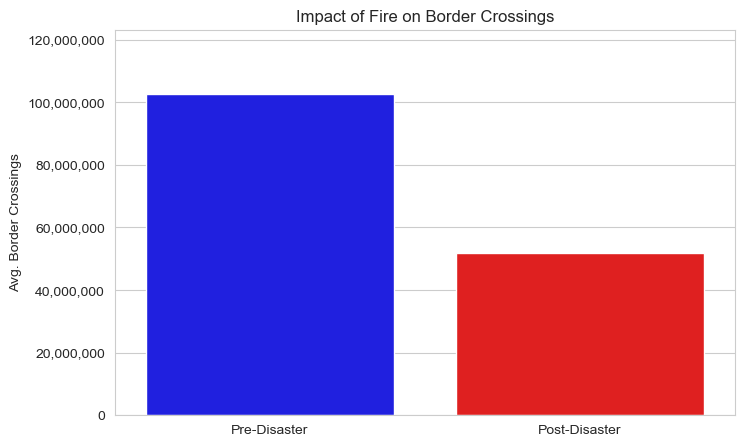

In [76]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Pre-Disaster', 'Post-Disaster'], y=[pre_disaster_data.mean(), post_disaster_data.mean()], palette=['blue', 'red'])
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Formats with commas (e.g., 1,000,000,000)

# Adjust y-axis limits if necessary
plt.ylim(0, max(pre_disaster_data.mean(), post_disaster_data.mean()) * 1.2)
plt.ylabel('Avg. Border Crossings')
plt.title(f'Impact of {disaster_type} on Border Crossings')
plt.show()


Analyzing Fire...
Average Pre-Disaster Border Crossings: 102,514,710.88
Average Post-Disaster Border Crossings: 51,712,736.03
T-Statistic: 0.8813, P-Value: 0.3785


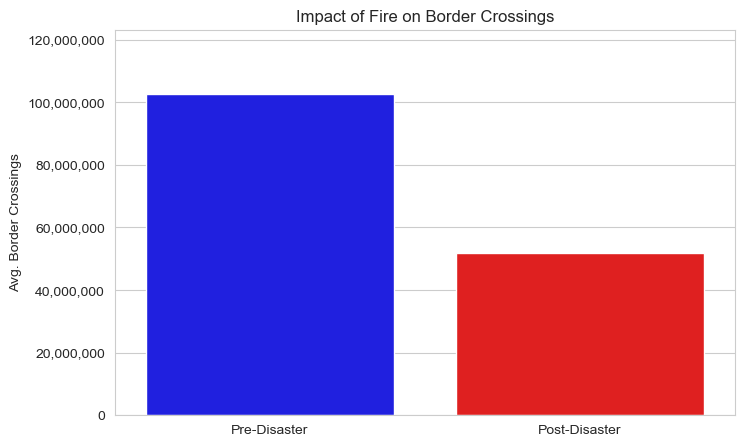

Analyzing Severe Storm...
Average Pre-Disaster Border Crossings: 72,100,588.78
Average Post-Disaster Border Crossings: 72,991,242.48
T-Statistic: -0.0269, P-Value: 0.9786


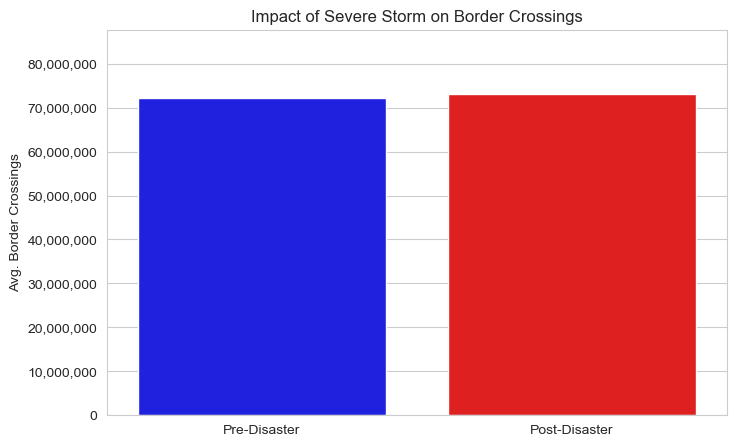

Analyzing Flood...
Average Pre-Disaster Border Crossings: 69,545,021.94
Average Post-Disaster Border Crossings: 59,828,919.00
T-Statistic: 0.2618, P-Value: 0.7937


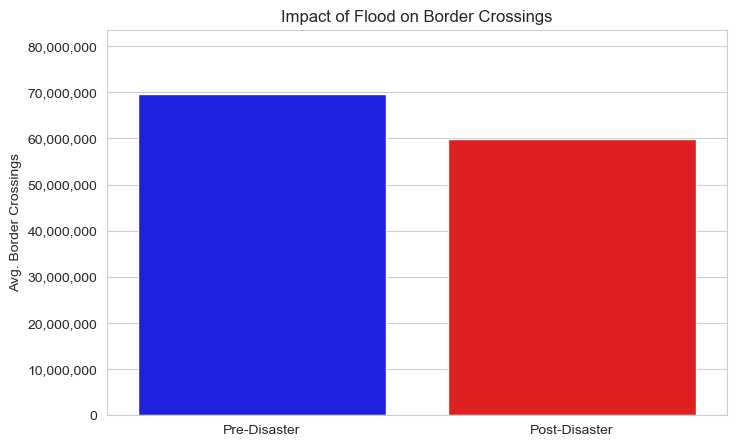

Analyzing Biological...
Average Pre-Disaster Border Crossings: 462,482,735.50
Average Post-Disaster Border Crossings: 9,928,209.67
T-Statistic: 1.1337, P-Value: 0.2710


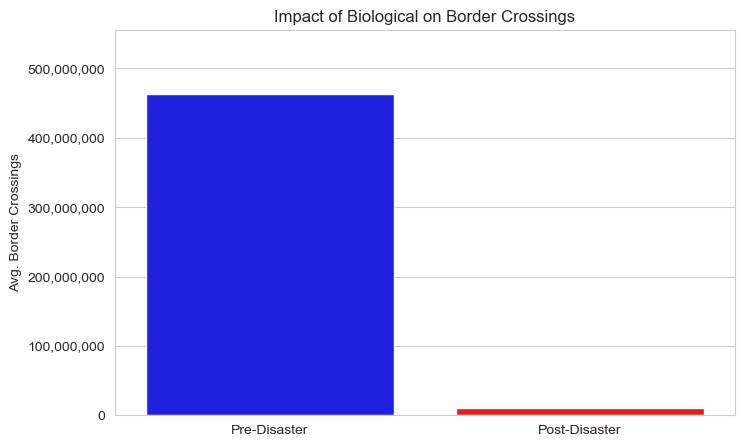

Analyzing Earthquake...
Average Pre-Disaster Border Crossings: 15,048,516.30
Average Post-Disaster Border Crossings: 38,303,968.69
T-Statistic: -0.9425, P-Value: 0.3553


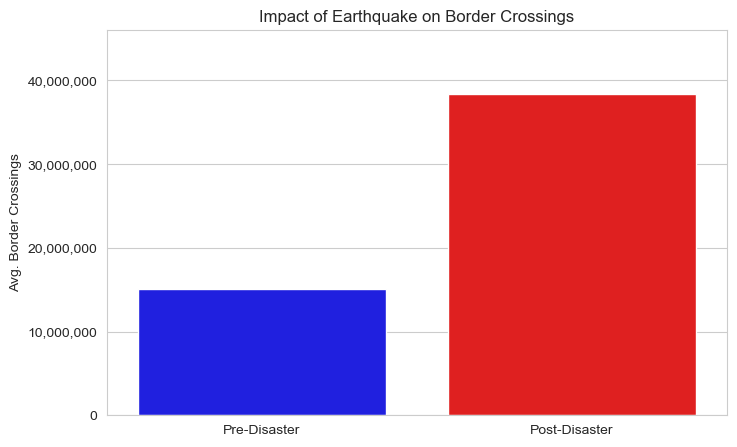

Analyzing Tsunami...
Average Pre-Disaster Border Crossings: 14,744,714.67
Average Post-Disaster Border Crossings: 20,994,115.75
T-Statistic: -0.4305, P-Value: 0.6847


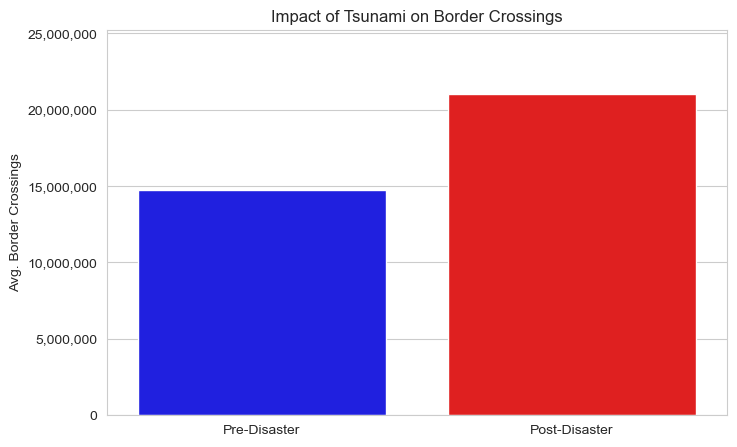

In [77]:
# disaster types to analyze
disaster_types = ['Fire', 'Severe Storm', 'Flood', 'Biological', 'Earthquake', 'Tsunami']  # Add more disaster types as needed

# Loop through each disaster type and perform the analysis
for disaster_type in disaster_types:
    print(f"Analyzing {disaster_type}...")
    
    # Filter data for the current disaster type
    disaster_data = merged_data[merged_data['incident_type'] == disaster_type].copy()

    # Convert year and month into a datetime column
    merged_data['Date'] = pd.to_datetime(merged_data[['Year', 'Month']].assign(day=1))

    # Identify disaster occurrence dates
    disaster_dates = disaster_data['Date'].unique()

    # Create Pre- and Post-Disaster labels
    merged_data['Disaster_Period'] = 'Normal'
    
    # Label Pre- and Post-Disaster periods
    for date in disaster_dates:
        pre_window = (merged_data['Date'] == date - pd.DateOffset(months=1))
        post_window = (merged_data['Date'] == date + pd.DateOffset(months=1))

        merged_data.loc[pre_window, 'Disaster_Period'] = 'Pre-Disaster'
        merged_data.loc[post_window, 'Disaster_Period'] = 'Post-Disaster'

    # Filter pre and post disaster data
    pre_disaster_data = merged_data[merged_data['Disaster_Period'] == 'Pre-Disaster']['Value']
    post_disaster_data = merged_data[merged_data['Disaster_Period'] == 'Post-Disaster']['Value']

    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(pre_disaster_data, post_disaster_data, nan_policy='omit')

    # Print results
    print(f"Average Pre-Disaster Border Crossings: {pre_disaster_data.mean():,.2f}")
    print(f"Average Post-Disaster Border Crossings: {post_disaster_data.mean():,.2f}")
    print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

    # **Bar Chart** - Shows the average difference
    plt.figure(figsize=(8, 5))
    sns.barplot(x=['Pre-Disaster', 'Post-Disaster'], y=[pre_disaster_data.mean(), post_disaster_data.mean()], palette=['blue', 'red'])
    
    # Set y-axis ticks to large numbers explicitly
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Formats with commas (e.g., 1,000,000,000)

    # Adjust y-axis limits if necessary
    plt.ylim(0, max(pre_disaster_data.mean(), post_disaster_data.mean()) * 1.2)
    plt.ylabel('Avg. Border Crossings')
    plt.title(f'Impact of {disaster_type} on Border Crossings')
    
    # Show the plot
    plt.show()


## Forecasting Models

In [78]:
from scipy.stats import kruskal

df = border_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure monthly resampling
df = df.resample('M').sum()

# Extract month as a new column
df['Month'] = df.index.month

# Group data by month 
monthly_groups = [group['Value'].values for name, group in df.groupby('Month') if len(group) > 1]

# Perform Kruskal-Wallis H-test across months
stat, p = kruskal(*monthly_groups)

print(f"Kruskal-Wallis H-statistic: {stat:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("→ Significant seasonality detected: border crossing values differ by month.")
else:
    print("→ No significant seasonality detected.")


Kruskal-Wallis H-statistic: 33.94
P-value: 0.0004
→ Significant seasonality detected: border crossing values differ by month.


In [79]:
import statsmodels.api as sm

orders = [(1,1,1), (0,1,1), (1,1,0), (1,1,2)]
seasonal_orders = [(1,1,0,12), (0,1,1,12), (1,1,1,12)]

for order in orders:
    for s_order in seasonal_orders:
        try:
            model = sm.tsa.statespace.SARIMAX(df['Value'],
                                              order=order,
                                              seasonal_order=s_order,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            result = model.fit(disp=False)
            print(f"Order: {order} Seasonal: {s_order} => AIC: {result.aic:.2f}, BIC: {result.bic:.2f}")
        except:
            continue


Order: (1, 1, 1) Seasonal: (1, 1, 0, 12) => AIC: 10017.64, BIC: 10032.69
Order: (1, 1, 1) Seasonal: (0, 1, 1, 12) => AIC: 9971.18, BIC: 9986.22
Order: (1, 1, 1) Seasonal: (1, 1, 1, 12) => AIC: 9970.71, BIC: 9989.50
Order: (0, 1, 1) Seasonal: (1, 1, 0, 12) => AIC: 10048.41, BIC: 10059.71
Order: (0, 1, 1) Seasonal: (0, 1, 1, 12) => AIC: 9970.14, BIC: 9981.42
Order: (0, 1, 1) Seasonal: (1, 1, 1, 12) => AIC: 9970.23, BIC: 9985.26
Order: (1, 1, 0) Seasonal: (1, 1, 0, 12) => AIC: 10022.16, BIC: 10033.45
Order: (1, 1, 0) Seasonal: (0, 1, 1, 12) => AIC: 10005.54, BIC: 10016.82
Order: (1, 1, 0) Seasonal: (1, 1, 1, 12) => AIC: 10005.68, BIC: 10020.72
Order: (1, 1, 2) Seasonal: (1, 1, 0, 12) => AIC: 10018.62, BIC: 10037.43
Order: (1, 1, 2) Seasonal: (0, 1, 1, 12) => AIC: 9940.19, BIC: 9958.97
Order: (1, 1, 2) Seasonal: (1, 1, 1, 12) => AIC: 9939.78, BIC: 9962.32


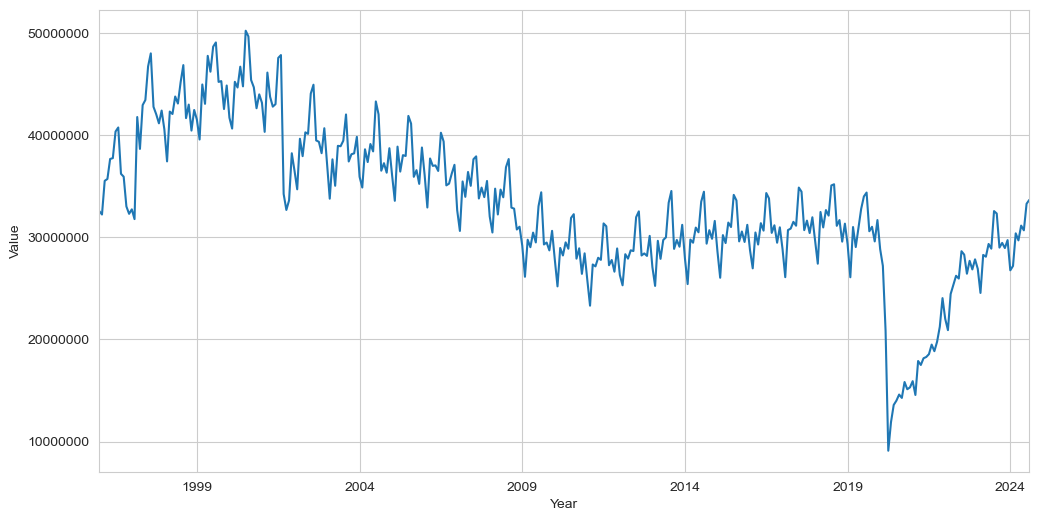

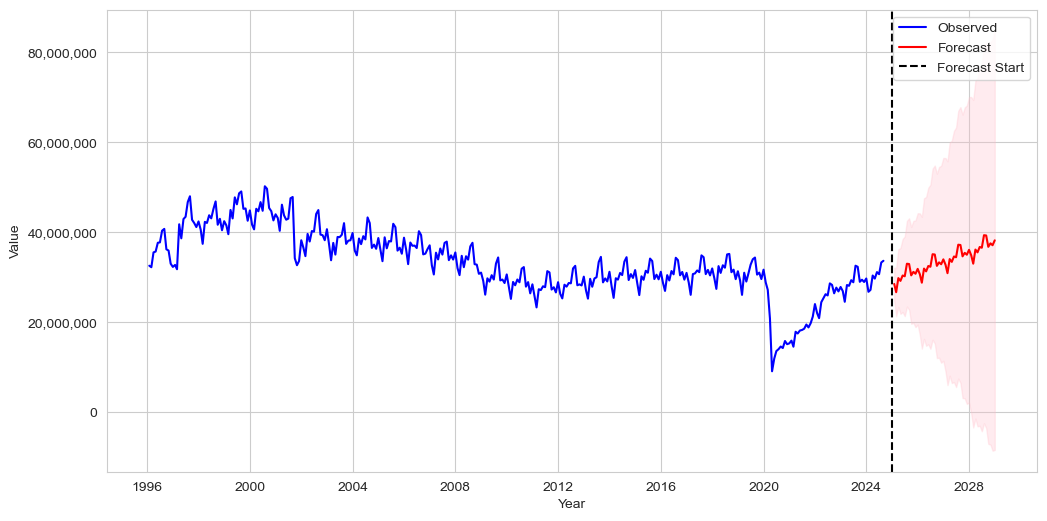

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
from matplotlib.ticker import FuncFormatter

register_matplotlib_converters()

# Load your dataset
df = border_data.copy()

# Ensure 'Date' is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample to monthly data if not already (group by year-month)
df = df.resample('M').sum()

# Plotting to visualize the data first (optional but useful)
df['Value'].plot(figsize=(12, 6))
#plt.title("Monthly Border Crossings Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

# Train-Test Split (Forecasting 2025+)
train = df[:'2023']
test = df['2024':]  # If 2024 data exists, use it for validation

sarima_model = sm.tsa.statespace.SARIMAX(train['Value'], 
                                         order=(1, 1, 2), 
                                         seasonal_order=(0, 1, 1, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Forecasting into 2025+
future_dates = pd.date_range(start='2025-01-01', periods=48, freq='M')  # 2-year forecast
forecast = sarima_fit.get_forecast(steps=48)
forecast_ci = forecast.conf_int()

# Create custom formatter for the y-axis
def format_ticks(x, pos):
    return '{:,.0f}'.format(x)  # Format with commas and no decimals

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Value'], label='Observed', color='blue')
plt.plot(future_dates, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(future_dates, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.axvline(pd.to_datetime('2025-01-01'), color='black', linestyle='--', label='Forecast Start')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
#plt.title('Predicted Border Crossings 2025-2026)')
plt.show()


In [83]:
df = border_data.copy()

In [85]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Filter for US-Canada border
canada = df[df["Border"] == "US-Canada Border"]

# Pivot the data into groups by month
monthly_groups = [group["Value"].values for _, group in canada.groupby("Month")]

# Run Kruskal-Wallis H Test
stat, p = kruskal(*monthly_groups)
print("Kruskal-Wallis statistic:", stat)
print("p-value:", p)


Kruskal-Wallis statistic: 327.3887282340356
p-value: 1.4613890811632138e-63


In [86]:
# Filter for US-Canada border
mexico = df[df["Border"] == "US-Mexico Border"]

# Pivot the data into groups by month
monthly_groups = [group["Value"].values for _, group in mexico.groupby("Month")]

# Run Kruskal-Wallis H Test
stat, p = kruskal(*monthly_groups)
print("Kruskal-Wallis statistic:", stat)
print("p-value:", p)


Kruskal-Wallis statistic: 7.447861631033666
p-value: 0.7617422809696006


In [87]:
orders = [(1,1,1), (0,1,1), (1,1,0), (1,1,2)]
seasonal_orders = [(1,1,0,12), (0,1,1,12), (1,1,1,12)]

best_model = None
best_aic = float("inf")
best_config = None

for order in orders:
    for s_order in seasonal_orders:
        try:
            model = sm.tsa.statespace.SARIMAX(canada_data,
                                              order=order,
                                              seasonal_order=s_order,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            result = model.fit(disp=False)
            print(f"Order: {order} Seasonal: {s_order} => AIC: {result.aic:.2f}, BIC: {result.bic:.2f}")
            if result.aic < best_aic:
                best_aic = result.aic
                best_model = result
                best_config = (order, s_order)
        except Exception as e:
            print(f"Failed for {order}, {s_order}: {e}")


Failed for (1, 1, 1), (1, 1, 0, 12): name 'canada_data' is not defined
Failed for (1, 1, 1), (0, 1, 1, 12): name 'canada_data' is not defined
Failed for (1, 1, 1), (1, 1, 1, 12): name 'canada_data' is not defined
Failed for (0, 1, 1), (1, 1, 0, 12): name 'canada_data' is not defined
Failed for (0, 1, 1), (0, 1, 1, 12): name 'canada_data' is not defined
Failed for (0, 1, 1), (1, 1, 1, 12): name 'canada_data' is not defined
Failed for (1, 1, 0), (1, 1, 0, 12): name 'canada_data' is not defined
Failed for (1, 1, 0), (0, 1, 1, 12): name 'canada_data' is not defined
Failed for (1, 1, 0), (1, 1, 1, 12): name 'canada_data' is not defined
Failed for (1, 1, 2), (1, 1, 0, 12): name 'canada_data' is not defined
Failed for (1, 1, 2), (0, 1, 1, 12): name 'canada_data' is not defined
Failed for (1, 1, 2), (1, 1, 1, 12): name 'canada_data' is not defined


C:\Users\saiha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saiha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saiha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saiha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\saiha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

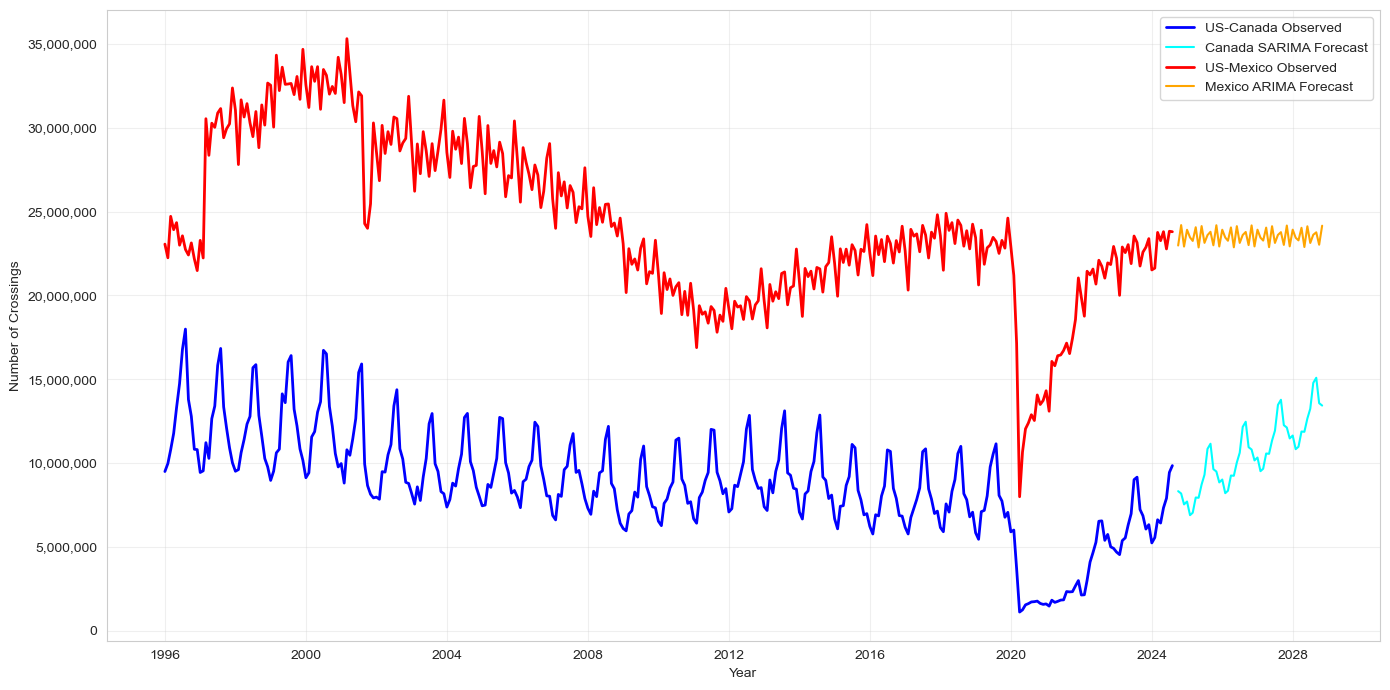

In [89]:
canada_data = border_data[border_data["Border"] == "US-Canada Border"].groupby("Date")["Value"].sum()
mexico_data = border_data[border_data["Border"] == "US-Mexico Border"].groupby("Date")["Value"].sum()

# ARIMA forecast function
def simple_arima_forecast(series, forecast_steps=50):
    model = ARIMA(series, order=(2, 1, 3))  # Same flexible ARIMA
    fit = model.fit()
    forecast = fit.forecast(steps=forecast_steps)
    return forecast

# Canada (SARIMA as before)
sarima_model = SARIMAX(canada_data, order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))
sarima_fit = sarima_model.fit()
canada_fc = sarima_fit.forecast(50)

# Mexico (ARIMA)
mexico_fc = simple_arima_forecast(mexico_data)

# Plotting
plt.figure(figsize=(14,7))

# US-Canada
plt.plot(canada_data.index, canada_data, 'b-', label="US-Canada Observed", lw=2)
plt.plot(pd.date_range(canada_data.index[-1], periods=51, freq='M')[1:], 
         canada_fc, 'cyan', label="Canada SARIMA Forecast")

# US-Mexico
plt.plot(mexico_data.index, mexico_data, 'r-', label="US-Mexico Observed", lw=2)
plt.plot(pd.date_range(mexico_data.index[-1], periods=51, freq='M')[1:], 
         mexico_fc, 'orange', label="Mexico ARIMA Forecast")

# Formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Year")
plt.ylabel("Number of Crossings")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("border_forecast_no_trend.png", dpi=300)
plt.show()
